# Identitas Kelompok
Nomor Kelompok: 5

Nama Kelompok: Lima-B-Aja

Ketua Kelompok: Fajar Arahman

Anggota kelompok:
1. MUHAMAD FAHMI AMIQ
2. FAJAR ARAHMAN
3. AMMAR KHAQ BAASIR
4. LIANUS
5. INDAH LESTARI
6. NADILA
7. FATIHAH
8. Meilia Choirun Nisa 

Pilihan Dataset: E-commerce Churn Rate

# Import Library & Load Dataset

In [179]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import missingno as msno

print(pd.__version__)
print(np.__version__)
print(matplotlib.__version__)
print(sns.__version__)

1.4.4
1.21.5
3.5.1
0.11.2


In [180]:
from matplotlib import rcParams

rcParams['figure.figsize'] = 12, 4
rcParams['lines.linewidth'] = 3
rcParams['xtick.labelsize'] = 'x-large'
rcParams['ytick.labelsize'] = 'x-large'

# STAGE 1 EDA, VISUALIZATION

In [181]:
df = pd.read_excel('dataset/e_commerce.xlsx', sheet_name=1)
df.head() 

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


# 1. Descriptive Statistics

In [182]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

In [183]:
df.PreferredLoginDevice.unique()

array(['Mobile Phone', 'Phone', 'Computer'], dtype=object)

In [184]:
df.PreferredPaymentMode.unique()

array(['Debit Card', 'UPI', 'CC', 'Cash on Delivery', 'E wallet', 'COD',
       'Credit Card'], dtype=object)

In [185]:
df.Gender.unique()

array(['Female', 'Male'], dtype=object)

In [186]:
df.PreferedOrderCat.unique()

array(['Laptop & Accessory', 'Mobile', 'Mobile Phone', 'Others',
       'Fashion', 'Grocery'], dtype=object)

In [187]:
df.MaritalStatus.unique()

array(['Single', 'Divorced', 'Married'], dtype=object)

In [188]:
df.duplicated().sum()

0

**Analisa**
* Jumlah data ada 5630 baris dan 20 kolom
* Tidak ada duplikat pada dataset
* Pada bagian PreferredPaymentethod terdapat kesamaan yaitu variabel 'Cash on Delivery' dengan 'COD' selain itu 'Credit Card' dengan 'CC'
* Pada kolom PreferedOrderCat terdapat kesamaan yaitu variabel 'Mobile' dan 'Mobile Phone'

* Pada kolom PreferredLoginDevice terdapat kesamaan yaitu variable 'Mobile Phone' dan 'Phone'

* A. Apakah ada kolom dengan tipe data kurang sesuai, atau nama kolom dan isinya kurang sesuai?

Pada bagian PreferredPaymentethod terdapat kesamaan yaitu variabel 'Cash on Delivery' dengan 'COD' selain itu 'Credit Card' dengan 'CC'

Pada kolom PreferedOrderCat terdapat kesamaan yaitu variabel 'Mobile' dan 'Mobile Phone'

Pada kolom PreferredLoginDevice terdapat kesamaan yaitu variable 'Mobile Phone' dan 'Phone'

* B. Apakah ada kolom yang memiliki nilai kosong? Jika ada, apa saja?

In [189]:
for i in df.columns:
    if df[i].isnull().sum() > 0:
        print(i)
        print('Jumlah data yang null:', df[i].isnull().sum())
        print('Tipe Data yaitu', df[i].dtypes)
        print()

Tenure
Jumlah data yang null: 264
Tipe Data yaitu float64

WarehouseToHome
Jumlah data yang null: 251
Tipe Data yaitu float64

HourSpendOnApp
Jumlah data yang null: 255
Tipe Data yaitu float64

OrderAmountHikeFromlastYear
Jumlah data yang null: 265
Tipe Data yaitu float64

CouponUsed
Jumlah data yang null: 256
Tipe Data yaitu float64

OrderCount
Jumlah data yang null: 258
Tipe Data yaitu float64

DaySinceLastOrder
Jumlah data yang null: 307
Tipe Data yaitu float64



* C. Apakah ada kolom yang memiliki nilai summary agak aneh? (min/mean/median/max/unique/top/freq) 


In [190]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
CustomerID,5630.0,52815.500000,1625.385339,50001.0,51408.25,52815.50,54222.7500,55630.00
Churn,5630.0,0.168384,0.374240,0.0,0.00,0.00,0.0000,1.00
Tenure,5366.0,10.189899,8.557241,0.0,2.00,9.00,16.0000,61.00
CityTier,5630.0,1.654707,0.915389,1.0,1.00,1.00,3.0000,3.00
WarehouseToHome,5379.0,15.639896,8.531475,5.0,9.00,14.00,20.0000,127.00
HourSpendOnApp,5375.0,2.931535,0.721926,0.0,2.00,3.00,3.0000,5.00
NumberOfDeviceRegistered,5630.0,3.688988,1.023999,1.0,3.00,4.00,4.0000,6.00
SatisfactionScore,5630.0,3.066785,1.380194,1.0,2.00,3.00,4.0000,5.00
NumberOfAddress,5630.0,4.214032,2.583586,1.0,2.00,3.00,6.0000,22.00
Complain,5630.0,0.284902,0.451408,0.0,0.00,0.00,1.0000,1.00


Tidak ada keanehan

### Pembagian Kategori

In [191]:
cats =['PreferredLoginDevice', 
                 'PreferredPaymentMode',
                 'Gender',
                 'PreferedOrderCat',
                 'MaritalStatus']

nums = ['CustomerID', 
              'Tenure', 
              'CityTier', 
              'WarehouseToHome', 
              'HourSpendOnApp', 
              'NumberOfDeviceRegistered', 
              'SatisfactionScore', 
              'NumberOfAddress', 
              'Complain', 
              'OrderAmountHikeFromlastYear',
              'CouponUsed', 
              'OrderCount', 
              'DaySinceLastOrder', 
              'CashbackAmount', 
              'Churn']

In [192]:
for col in cats:
    print(f'''Value count kolom {col}:''')
    print(df[col].value_counts())
    print('\n')

Value count kolom PreferredLoginDevice:
Mobile Phone    2765
Computer        1634
Phone           1231
Name: PreferredLoginDevice, dtype: int64


Value count kolom PreferredPaymentMode:
Debit Card          2314
Credit Card         1501
E wallet             614
UPI                  414
COD                  365
CC                   273
Cash on Delivery     149
Name: PreferredPaymentMode, dtype: int64


Value count kolom Gender:
Male      3384
Female    2246
Name: Gender, dtype: int64


Value count kolom PreferedOrderCat:
Laptop & Accessory    2050
Mobile Phone          1271
Fashion                826
Mobile                 809
Grocery                410
Others                 264
Name: PreferedOrderCat, dtype: int64


Value count kolom MaritalStatus:
Married     2986
Single      1796
Divorced     848
Name: MaritalStatus, dtype: int64




In [193]:
df.isna().sum()

CustomerID                       0
Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64

## Persentase missing value

In [194]:
# jumlah data null
grouped_data = []
for col in df.columns:
    n_missing = df[col].isnull().sum()
    percentage = n_missing / df.shape[0] * 100
    grouped_data.append([col, n_missing, percentage])

grouped_df = pd.DataFrame(grouped_data, columns=['column', 'n_missing', 'percentage'])

result = grouped_df.groupby(['column', 'n_missing', 'percentage']).size()
result

column                       n_missing  percentage
CashbackAmount               0          0.000000      1
Churn                        0          0.000000      1
CityTier                     0          0.000000      1
Complain                     0          0.000000      1
CouponUsed                   256        4.547069      1
CustomerID                   0          0.000000      1
DaySinceLastOrder            307        5.452931      1
Gender                       0          0.000000      1
HourSpendOnApp               255        4.529307      1
MaritalStatus                0          0.000000      1
NumberOfAddress              0          0.000000      1
NumberOfDeviceRegistered     0          0.000000      1
OrderAmountHikeFromlastYear  265        4.706927      1
OrderCount                   258        4.582593      1
PreferedOrderCat             0          0.000000      1
PreferredLoginDevice         0          0.000000      1
PreferredPaymentMode         0          0.000000     

* CouponUsed = 4.54%
* DaySinceLastOrder = 5.45%
* HourSpendOnApp = 4.52%
* OrderAmountHikeFromlastYear = 4.7%
* OrderCount = 4.58%
* Tenure = 4.68%
* WarehouseToHome = 4.45%

# 2. Univariate Analysis

Gunakan visualisasi untuk melihat distribusi masing-masing kolom (feature maupun
target). Tuliskan hasil observasinya, misalnya jika ada suatu kolom yang distribusinya
menarik (misal skewed, bimodal, ada outlier, ada nilai yang mendominasi, kategorinya
terlalu banyak, dsb). Jelaskan juga apa yang harus di-follow up saat data pre-processing.

### Box Plot

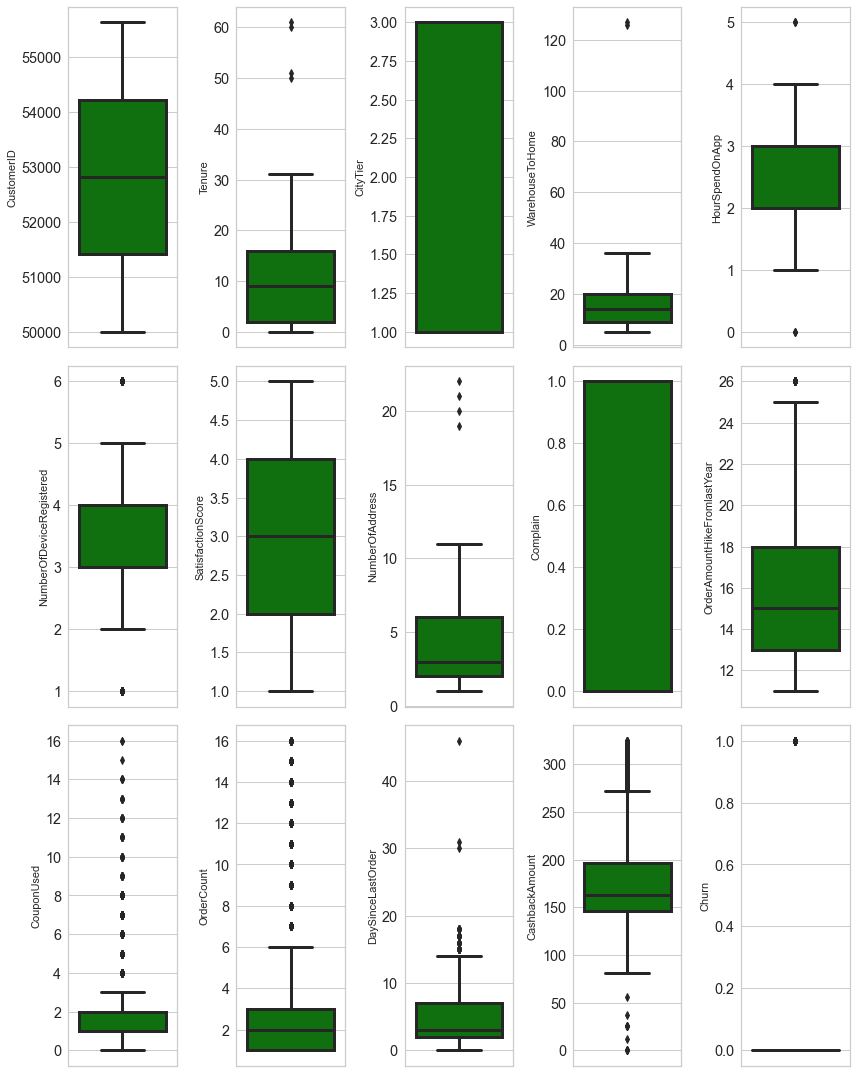

In [195]:
plt.figure(figsize=(12, 20))
for i in range(0, len(nums)):
    plt.subplot(4, int(len(nums)/3), i+1)
    sns.boxplot(y=df[nums[i]], color='green', orient='v')
    plt.tight_layout()

**Hasil Observasi Boxplot:**
> Semua data numerik memiliki outlier


### Distribution Graph

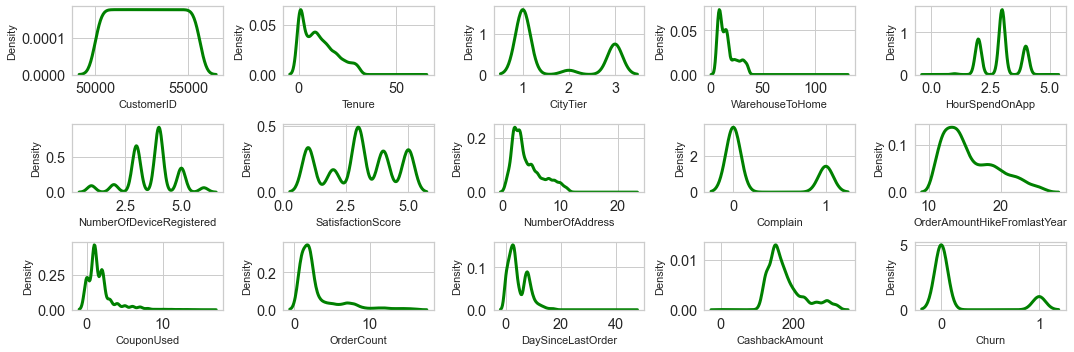

In [196]:
plt.figure(figsize=(15, 5))
for i in range(0, len(nums)):
    plt.subplot(3, 5, i+1)
    sns.kdeplot(x=df[nums[i]], color='green')
    plt.xlabel(nums[i])
    plt.tight_layout()

**Hasil Observasi:**

| Fitur                     | Jenis Distribusi             | Deskripsi                                                      | Tindak Lanjut                                                   |
|---------------------------|------------------------------|-----------------------------------------------------------------|-------------------------------------------------------------------|
| CustomerID                | Uniform                      | Setiap ID bersifat unik dan muncul kira-kira satu kali.          | Pertimbangkan untuk menurunkan fitur ini karena mungkin tidak berguna untuk model prediksi.                                |
| Tenure                    | Bimodal                      | Ada dua kelompok pelanggan berdasarkan masa kerja mereka.         | Selidiki alasan bimodality dan pertimbangkan segmentasi pelanggan berdasarkan masa kerja untuk strategi yang lebih tertarget.     |
| CityTier                  | Multimodal (tiga puncak)      | Mayoritas pelanggan berada pada tingkat 1 dan 2, dengan lebih sedikit pelanggan pada tingkat 3. | Pertimbangkan one-hot encoding untuk representasi yang akurat saat pemodelan.                                             |
| WarehouseToHome           | Right-skewed                 | Sebagian besar pelanggan tinggal lebih dekat dengan gudang.       | Terapkan transformasi seperti log atau akar kuadrat untuk mengurangi kemiringan.                                              |
| HourSpendOnApp            | Bimodal                      | Menunjukkan dua kelompok utama perilaku pengguna terkait durasi penggunaan aplikasi. | Selidiki alasan bimodality dan pertimbangkan segmentasi pengguna berdasarkan waktu penggunaan aplikasi.                    |
| NumberOfDeviceRegistered  | Right-skewed                 | Mayoritas pelanggan mendaftarkan 2-3 perangkat.                    | Terapkan transformasi seperti log atau akar kuadrat untuk mengurangi kemiringan.                                              |
| SatisfactionScore         | Multimodal (tiga puncak)      | Beragam tingkat kepuasan pelanggan.                               | Mensegmentasikan pelanggan berdasarkan skor ini dapat memberikan wawasan yang berguna.                                        |
| NumberOfAddress           | Right-skewed                 | Mayoritas pelanggan mendaftarkan 1-2 alamat.                       | Terapkan transformasi seperti log atau akar kuadrat untuk mengurangi kemiringan.                                              |
| Complain                  | Mayoritas nilai 0            | Mayoritas pelanggan belum mengajukan keluhan.                      | Periksa ketidakseimbangan kelas jika digunakan sebagai fitur. Mungkin diperlukan oversampling atau undersampling.            |
| OrderAmountHikeFromlastYear | Bimodal                     | Dua kelompok berbeda di sekitar nilai 10 dan 20.                   | Telusuri alasan bimodality dan pertimbangkan segmentasi berdasarkan kenaikan jumlah pesanan.                                 |
| CouponUsed                | Right-skewed                 | Mayoritas pelanggan menggunakan sejumlah kecil kupon.               | Pertimbangkan normalisasi menggunakan transformasi log atau akar kuadrat untuk mengatasi kemiringan.                        |
| OrderCount                | Right-skewed                 | Mayoritas pelanggan memiliki jumlah pesanan yang lebih rendah.      | Pertimbangkan normalisasi menggunakan transformasi untuk mengatasi kemiringan.                                              |
| DaySinceLastOrder         | Puncak di sekitar 20 hari    | Mayoritas pelanggan memiliki jeda sekitar 20 hari sejak pesanan terakhir mereka. | Telusuri alasan puncak ini untuk mendapatkan wawasan tentang perilaku pelanggan.                                        |
| CashbackAmount            | Right-skewed                 | Mayoritas pelanggan menerima jumlah cashback yang lebih kecil.     | Pertimbangkan normalisasi menggunakan transformasi untuk mengatasi kemiringan.                                              |
| Churn                     | Distribusi Biner             | Lebih sedikit pelanggan yang churn dibandingkan yang tidak.        | Pastikan tidak ada ketidakseimbangan kelas. Gunakan oversampling, undersampling, atau metrik evaluasi yang sesuai.             |


### Histogram categorical data

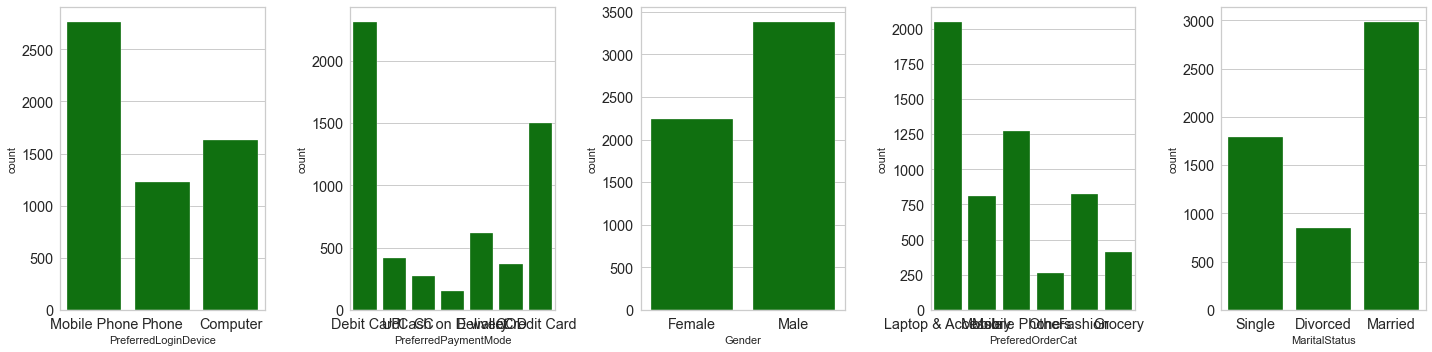

In [197]:
plt.figure(figsize=(20,5))
for i in range(0, len(cats)):
    plt.subplot(1, len(cats), i+1)
    sns.countplot(x=df[cats[i]], color ='green')
    plt.tight_layout()

**Hasil Observasi:** 
> * PrefferedLoginDevice mayoritas adalah Mobile Phone
> * PrefferedPaymentMode mayoritas adalah Debit Card
> * Gender mayoritas adalah Male
> * PrefferedOrderCat mayoritas adalah Laptop & Accessory
> * MaritalStatus mayoritas adalah Married

# 3. Multivariate Analysis

Lakukan multivariate analysis (seperti correlation heatmap dan category plots, sesuai yang
diajarkan di kelas). Tuliskan hasil observasinya, seperti:
* A. Bagaimana korelasi antara masing-masing feature dan label. Kira-kira feature mana saja yang paling relevan dan harus dipertahankan?
* B. Bagaimana korelasi antar-feature, apakah ada pola yang menarik? Apa yang perlu dilakukan terhadap feature itu?
* Tuliskan juga jika memang tidak ada feature yang saling berkorelasi

In [198]:
df[nums].corr()

,CustomerID,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount,Churn
CustomerID,1.000000,0.029952,0.003239,0.058909,0.598417,0.411098,-0.033146,0.160814,-0.009944,0.117243,0.234302,0.139008,0.113243,0.217129,-0.019083
Tenure,0.029952,1.000000,-0.060688,-0.018218,-0.021226,-0.023983,-0.013903,0.237666,-0.021268,0.005825,0.129035,0.186403,0.184552,0.476380,-0.349408
CityTier,0.003239,-0.060688,1.000000,0.010624,-0.009150,0.027934,-0.011554,-0.029440,0.003375,-0.031408,0.021456,0.033388,0.017525,0.055746,0.084703
WarehouseToHome,0.058909,-0.018218,0.010624,1.000000,0.060990,0.019071,0.007722,-0.011020,0.028696,0.038795,-0.003935,0.002681,0.017829,-0.009200,0.076630
HourSpendOnApp,0.598417,-0.021226,-0.009150,0.060990,1.000000,0.316800,0.031858,0.145126,0.006976,0.106843,0.191528,0.109575,0.075716,0.121490,0.018675
NumberOfDeviceRegistered,0.411098,-0.023983,0.027934,0.019071,0.316800,1.000000,-0.017228,0.084997,0.003407,0.069475,0.151685,0.103464,0.018208,0.137183,0.107939
SatisfactionScore,-0.033146,-0.013903,-0.011554,0.007722,0.031858,-0.017228,1.000000,0.053583,-0.031115,-0.027730,0.017936,0.019764,0.032082,0.003473,0.105481
NumberOfAddress,0.160814,0.237666,-0.029440,-0.011020,0.145126,0.084997,0.053583,1.000000,-0.026399,0.015533,0.042120,-0.007609,-0.064847,0.186688,0.043931
Complain,-0.009944,-0.021268,0.003375,0.028696,0.006976,0.003407,-0.031115,-0.026399,1.000000,-0.004529,-0.008174,-0.019307,-0.043546,0.000525,0.250188
OrderAmountHikeFromlastYear,0.117243,0.005825,-0.031408,0.038795,0.106843,0.069475,-0.027730,0.015533,-0.004529,1.000000,0.033201,0.023101,0.006003,0.017869,-0.010058


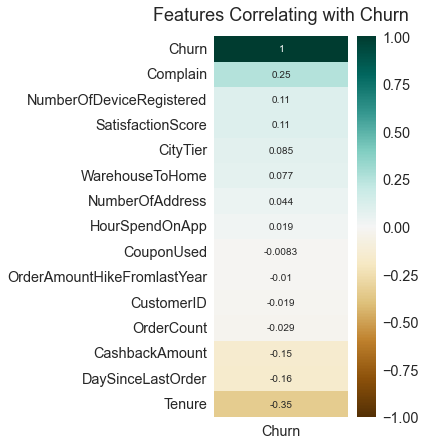

In [199]:
plt.figure(figsize=(3, 7))
heatmap = sns.heatmap(df[nums].corr()[['Churn']].sort_values(by='Churn', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with Churn', fontdict={'fontsize':18}, pad=16);

Analisa : 
- 'Tenure' memiliki korelasi negative sedang sebesar -0.35 dengan churn, ini menunjukkan bahwa tenure memiliki korelasi berkebalikan dengan churn. 
- Feature - Feature lain memiliki nilai korelasi yang sangat rendah yakni mendekati nilai 0. hal ini menunjukkan bahwa beberapa Feature yang mendekati nilai 0 tersebut, tidak memiliki korelasi dengan churn. 

Action : 
- Terdapat beberapa Feature penting yang memiliki korelasi nilai sedang (menjauhi nilai 0), beberapa Feature ini dapat dipertahankan untuk dapat dijadikan Feature utama (feature penting) dalam proses training model machine learning. Feature - Feature tersebut seperti Complain, dan Tenure. 
- Feature - Feature yang memiliki korelasi low (mendekati nilai 0) harus dipertimbangkan untuk dibuang atau dipertahankan, karena beberapa Feature tersebut bisa jadi memiliki informasi penting yang unik yang berguna untuk bahan pembelajaran model machine learning yang digunakan.  

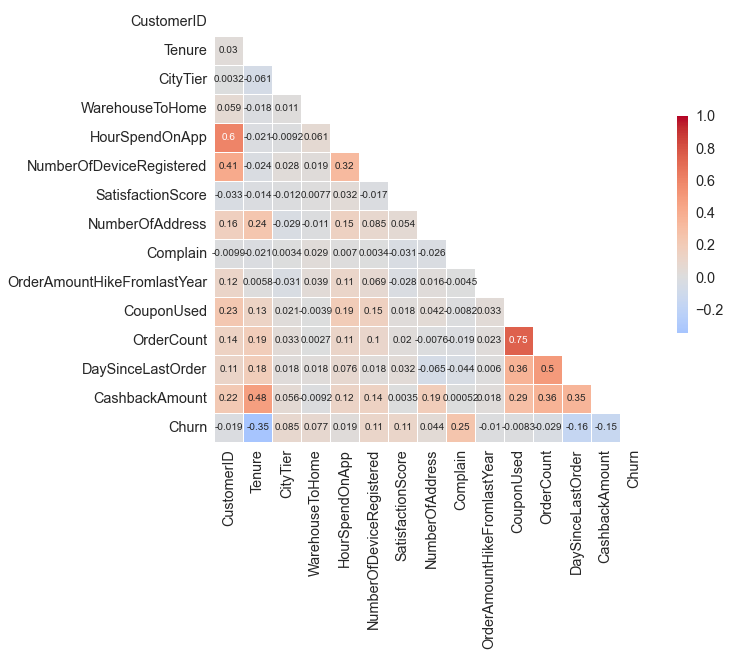

In [200]:
# Compute the correlation matrix
corr = df[nums].corr()

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap='coolwarm', vmax=1, center=0, annot=True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.show()


Analisa : 
- Terdapat dua Feature yang memiliki korelasi positif cukup tinggi yakni Feature CouponUsed dengan Feature OrderCount yang memiliki nilai sebesar 0.75
- Terdapat juga dua Feature yang saling berkolerasi positif sedang dengan nilai 0.5 yakni Feature OrderCount dengan Feature DaySinceLastOrder. selian itu Feature Tenure dengan CashbackAmount juga memiliki korelasi positif sedang dengan nilai 0.48
- Terdapat banyak Feature yang memiliki nilai korelasi low (nilainya mendekati 0) dalam hal ini secara umum dapat dikatakan bagus karena mungkin beberapa Feature tersebut dapat memberikan informasi - informasi yang unik untuk model machine learning yang akan digunakan. 

Action : 
- Mempertahankan beberapa fitur yang memiliki nilai korelasi yang tinggi seperti CouponUsed dengan OrderCount
- Mempertimbangkan membuang fitur CustomerID, walaupun CustomerID memiliki nilai korelasi yang tinggi dengan HourSpendOnApp yakni sebesar 0.6 fitur ini masih akan dipertimbangkan untuk dibuang karena diyakini tidak memiliki hubungan antara keduanya. 
- Mempertimbangkan beberapa fitur seperti CouponUsed dengan OrderCount yang memiliki korelasi cukup tinggi, dipertimbangkan untuk menggabungkan kedua Feature tersebut menjadi satu fitur atau membuang salah satu Feature. 

# 4. Business Insight

Selain EDA, lakukan juga beberapa analisis dan visualisasi untuk menemukan suatu
business insight. Tuliskan minimal 3 insight, dan berdasarkan insight tersebut jelaskan
rekomendasinya untuk bisnis.

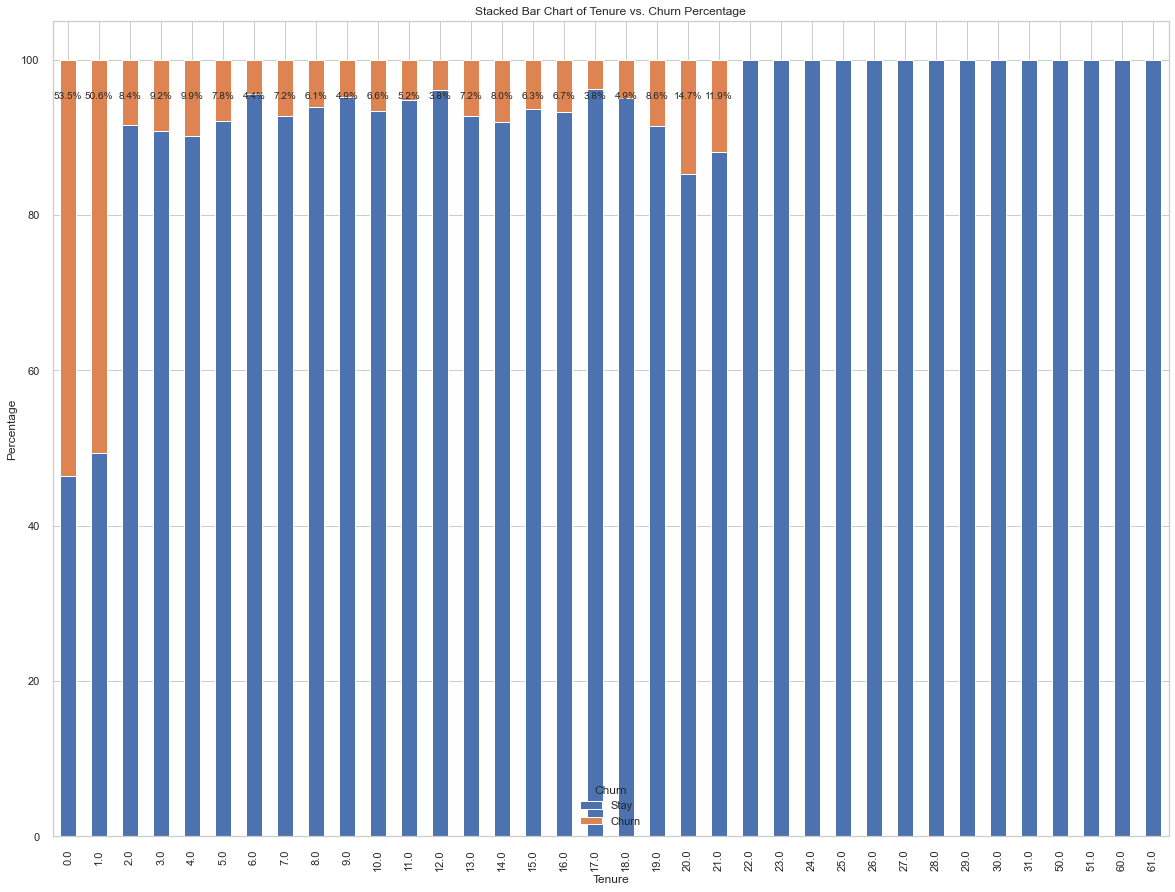

In [201]:
# Hitung persentase Churn dan Stay di setiap Tenure
tenure_churn_counts = df.groupby(['Tenure', 'Churn']).size().unstack()
tenure_churn_percentage = (tenure_churn_counts.div(tenure_churn_counts.sum(axis=1), axis=0) * 100)

# Gunakan Seaborn untuk membuat grafik batang bertumpuk dengan persentase
sns.set(style="whitegrid")
ax = tenure_churn_percentage.plot(kind='bar', stacked=True, figsize=(20, 15))

plt.xlabel('Tenure')
plt.ylabel('Percentage')
plt.title('Stacked Bar Chart of Tenure vs. Churn Percentage')

# Tambahkan label pada legenda
plt.legend(title='Churn', labels=['Stay', 'Churn'])

# Tambahkan label angka pada setiap bar Churn dengan jarak antara bar
for p in ax.patches[len(tenure_churn_counts):]:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.1f}%', (x + width/2, y + height - 5), ha='center', fontsize=10)

# Tampilkan grafik
plt.show()

### Observation & Insight:
Customer dengan Tenure rendah (kurang dari 2 bulan) memiliki potensi churn jauh lebih tinggi daripada tenure menengah keatas. Terlihat dalam grafik tenure 0-1 bulan memiliki persentase churn yang paling tinggi sebesar 53,5%.Tenure 1-2 bulan memiliki persentase churn yang tinggi juga sebesar 50,6%. Sedangkan Tenure yang lebih dari 2 bulan memiliki sampai 21 bulan memiliki median sekitar 13,9%. Dari grafik juga terlihat customer yang memiliki tenure lebih dari sama dengan 22 bulan tidak ada customer yang Churn

Berikut beberapa rekomendasi bisnis yang dapat membantu Anda memfokuskan upaya untuk menjaga pelanggan yang baru bergabung:

1. Program Onboarding yang Efektif: Buatlah program onboarding yang efektif untuk pelanggan yang baru bergabung, dengan panduan langkah demi langkah yang memudahkan mereka dalam menggunakan aplikasi dan berbelanja. Sediakan bantuan dan dukungan pelanggan yang mudah diakses selama periode onboarding.

2. Penawaran Spesial untuk Tenure Rendah: Berikan penawaran spesial, diskon, atau hadiah kepada pelanggan dengan tenure rendah untuk mendorong mereka berbelanja lebih banyak. Buatlah paket promosi khusus untuk produk-produk yang biasanya dibeli oleh pelanggan baru.

3. Customer Engagement: Fokus pada customer engagement dengan mengirimkan email, notifikasi, atau pesan langsung yang memberikan informasi tentang produk, penawaran khusus, atau rekomendasi berdasarkan perilaku mereka.

4. Program Loyalty: Implementasikan program loyalty yang memberikan insentif kepada pelanggan yang tetap berbelanja dengan Anda. Berikan poin atau diskon tambahan setelah pelanggan mencapai tenure tertentu. Berikan insentif kepada pelanggan yang mereferensikan teman atau keluarga untuk bergabung dengan aplikasi Anda.

In [202]:
df2 = df.copy()
df2['Complain'].map({0: 'No', 1: 'Yes'})

# Group the data by 'Complain', 'Churn', and count the number of occurrences
grouped_data = df2.groupby(['Complain', 'Churn']).size().reset_index(name='Count')

# Calculate the percentage of customers in each stack
grouped_data['Percentage'] = grouped_data['Count'] / grouped_data.groupby('Complain')['Count'].transform('sum') * 100
grouped_data['Percentage'] = grouped_data['Percentage'].round(2)

# Plot the horizontal percentage stacked bar chart
fig = px.bar(grouped_data, x='Percentage', y='Complain', orientation='h', color='Churn',
             title='Horizontal Percentage Stacked Bar Chart of Customers by Complain and Churn',
             color_discrete_sequence=['#3A506B', '#BA1F33'],
             labels={'Complain': 'Customer Complain', 'Percentage': 'Customer Percentage'})

# Customize the plot
fig.update_layout(barmode='stack')
fig.update_traces(texttemplate='%{value}', textposition='inside')
fig.update_xaxes(title_text='Customer Percentage (%)')
fig.update_yaxes(title_text='Customer Complain')

fig.show()

### Observation & Insight:
Persentase churn akibat customer complain (31.67%) hampir 3 kali lebih besar dari
persentase churn dari total customer yang tidak complain (10.92%)


upaya bisnis Anda pada mengurangi jumlah pelanggan yang mengajukan komplain dengan strategi berikut:
1. Analisis dan Perbaikan Pengalaman Pelanggan: Lakukan survei pelanggan dan analisis lebih lanjut untuk memahami penyebab komplain pelanggan. Identifikasi masalah umum dan tindakan korektif yang diperlukan. Tingkatkan pengalaman pelanggan dengan memastikan website atau aplikasi mudah digunakan, proses pembayaran yang lancar, dan pelayanan pelanggan yang responsif.

2. Pemantauan dan Umpan Balik: Pantau secara rutin umpan balik pelanggan dan komplain yang masuk. Gunakan data ini untuk terus meningkatkan produk dan layanan Anda. Tanggapi komplain dengan cepat dan efisien, dan berikan resolusi yang memuaskan kepada pelanggan.

3. Transparansi dan Komunikasi: Jalin komunikasi terbuka dengan pelanggan. Berikan informasi yang jelas tentang produk, harga, dan kebijakan pengembalian barang. Berikan pembaruan kepada pelanggan jika terjadi keterlambatan pengiriman atau perubahan kebijakan penting lainnya.

In [203]:
import pandas as pd
import plotly.express as px

# Assuming you have a DataFrame named df with relevant columns

# Calculate the percentage
grouped_data = df.groupby(['PreferedOrderCat', 'Churn']).size().reset_index(name='Count')
total_counts = grouped_data.groupby('PreferedOrderCat')['Count'].transform('sum')
grouped_data['Percentage'] = (grouped_data['Count'] / total_counts) * 100

# Plot the horizontal stacked bar chart
fig = px.bar(grouped_data, x='Percentage', y='PreferedOrderCat', orientation='h', color='Churn',
             title='Horizontal Stacked Bar Chart of Prefer Order Category and Churn',
             color_discrete_sequence=['#3A506B', '#BA1F33'],
             labels={'PreferedOrderCat': 'Order Category', 'Percentage': 'Percentage', 'Count': 'Customer Count'})

# Customize the plot
fig.update_layout(barmode='stack')
fig.update_traces(texttemplate='%{value:.2f}%', textposition='inside')
fig.update_xaxes(title_text='Percentage')
fig.update_yaxes(title_text='Order Category')

fig.show()


## Observation & Insight:
Customer yang mengorder kategori Mobile Phone dan Phone cenderung untuk churn,
dengan persentase sebesar 27.53% untuk Mobile Phone dan 27.19% untuk Phone. Jika
dibandingkan dengan customer yang mengorder kategori barang lainnya

Ada beberapa strategi yang dapat membantu Anda mengurangi churn pelanggan di masa yang akan datang:
1. Optimalkan Pengalaman Pelanggan untuk Kategori "Mobile Phone", "Mobile", dan "Laptop & Accessory": Identifikasi masalah yang umum terjadi dalam kategori ini, seperti pengiriman yang lambat, kualitas produk yang rendah, atau pelayanan pelanggan yang kurang baik. Tingkatkan pengalaman pelanggan dengan memastikan produk dalam kategori ini berkualitas tinggi, pelayanan pelanggan yang responsif, dan proses pengiriman yang cepat.

2. Tawarkan Promosi Khusus untuk Kategori "Grocery" dan "Others": Meskipun kategori "Grocery" dan "Others" memiliki tingkat churn yang rendah, Anda dapat mempertimbangkan untuk menawarkan promosi khusus, diskon, atau insentif kepada pelanggan yang membeli produk dalam kategori ini. Ini dapat meningkatkan loyalitas pelanggan.

# STAGE 2 DATA PRE-PROCESSING

In [204]:
df.head(5)

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


In [205]:
df.loc[df['PreferredLoginDevice'] == 'Phone', 'PreferredLoginDevice' ] = 'Mobile Phone'
df.loc[df['PreferedOrderCat'] == 'Mobile', 'PreferedOrderCat' ] = 'Mobile Phone'

Direname jadi satu variabel dikarenakan sama phone dengan mobile phone untuk kategori logindevice dan ordercat

In [206]:
df.loc[df['PreferredPaymentMode'] == 'COD', 'PreferredPaymentMode' ] = 'Cash on Delivery'   # uses loc function
df.loc[df['PreferredPaymentMode'] == 'CC', 'PreferredPaymentMode' ] = 'Credit Card'

Dikarenakan makna cod dengan cc adalah Cash on Delivery dan Credit Card, jadi direname variabelnya

In [207]:
df['PreferredPaymentMode'].unique()

array(['Debit Card', 'UPI', 'Credit Card', 'Cash on Delivery', 'E wallet'],
      dtype=object)

# 1. Data Cleansing

### A. Handling Missing Values

In [208]:
# melihat presentase missing value pada data 
missing_value = pd.DataFrame(df.isna().sum(), columns = ['Missing Values'])
missing_value['% Missing Values'] = df.isna().sum() / len(df)*100
missing_value = missing_value[missing_value['% Missing Values'] > 0]
missing_value

,Missing Values,% Missing Values
Tenure,264,4.689165
WarehouseToHome,251,4.458259
HourSpendOnApp,255,4.529307
OrderAmountHikeFromlastYear,265,4.706927
CouponUsed,256,4.547069
OrderCount,258,4.582593
DaySinceLastOrder,307,5.452931


In [209]:
x = sum(missing_value['% Missing Values'])
print((f'Total persentase missing value: {x:.2f}%'))

Total persentase missing value: 32.97%


Karena presentase missing value setiap kategori besar dan jika di drop data menjadi kehilangan sekitar 32% rows. Maka missing value tidak bisa di drop. Langkah selanjutnya yang digunakan adalah imputasi

<AxesSubplot:>

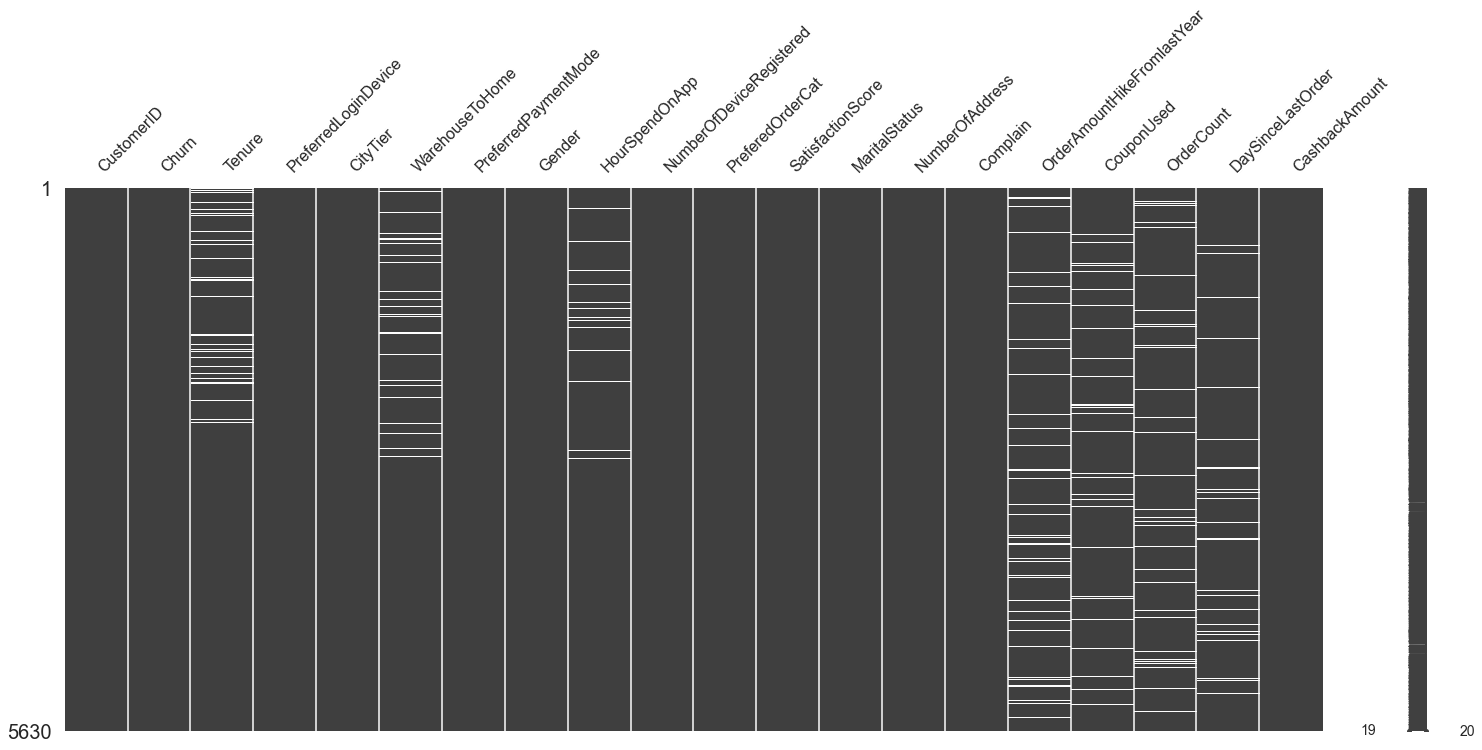

In [210]:
msno.matrix(df)

<AxesSubplot:>

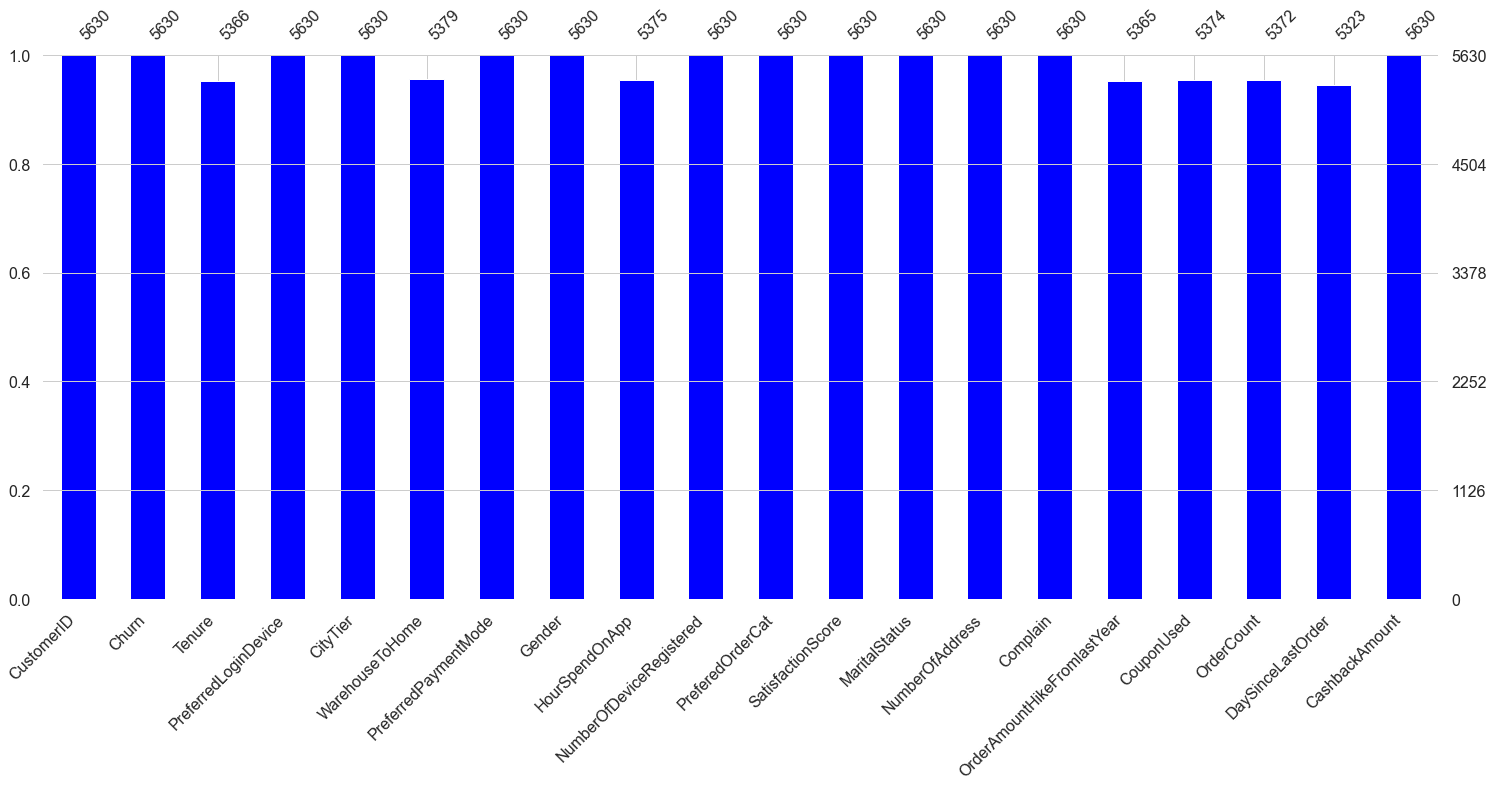

In [211]:
msno.bar(df, color='blue')

In [212]:
#memisahkan data tipe Kontinu(Interval)
kontinu_interval  = ['Tenure', 'WarehouseToHome', 'HourSpendOnApp', 'NumberOfDeviceRegistered', 'NumberOfAddress',
                     'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount', 'DaySinceLastOrder', 'CashbackAmount']

Sebelum di impute

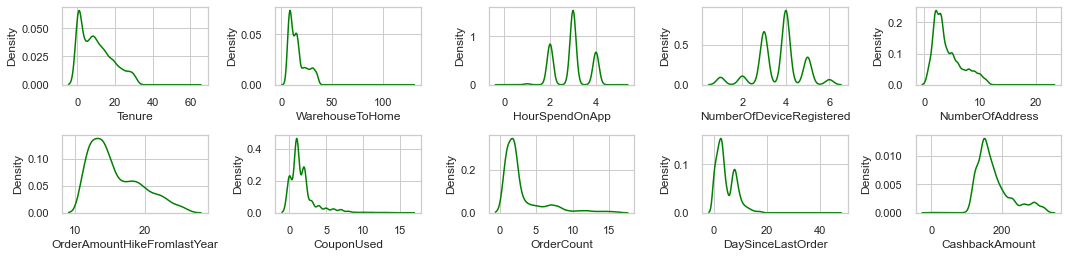

In [213]:
plt.figure(figsize=(15, 5))
for i in range(0, len(kontinu_interval)):
    plt.subplot(3, 5, i+1)
    sns.kdeplot(x=df[kontinu_interval[i]], color='green')
    plt.xlabel(kontinu_interval[i])
    plt.tight_layout()
plt.show()

In [214]:
df.isnull().sum()

CustomerID                       0
Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64

In [215]:
# impute missing value
df['Tenure'].fillna(df['Tenure'].median(), inplace=True)
df['WarehouseToHome'].fillna(df['WarehouseToHome'].median(), inplace=True)
df['HourSpendOnApp'].fillna(df['HourSpendOnApp'].mode()[0], inplace=True)
df['OrderAmountHikeFromlastYear'].fillna(df['OrderAmountHikeFromlastYear'].median(), inplace=True)
df['CouponUsed'].fillna(df['CouponUsed'].median(), inplace=True)
df['OrderCount'].fillna(df['OrderCount'].median(), inplace=True)
df['DaySinceLastOrder'].fillna(df['DaySinceLastOrder'].median(), inplace=True)

Berdasarkan pengamatan diatas. Berikut adalah strategi kita mengatasi missing values pada setiap kolom. 

* `Tenure` \: impute dengan nilai median (dari `df.describe` kita tau distribusinya skewed)
* `WarehouseToHome` \: impute dengan nilai median (dari `df.describe` kita tau distribusinya skewed)
* `HourSpendOnApp` \: impute dengan nilai modus (karena merupakan data dengan jenis kategorik numerik)
* `OrderAmountHikeFromlastYear` \: impute dengan nilai median (dari `df.describe` kita tau distribusinya skewed)
* `CouponUsed` \: impute dengan nilai median (dari `df.describe` kita tau distribusinya skewed)
* `OrderCount` \: impute dengan nilai median (dari `df.describe` kita tau distribusinya skewed)
* `DaySinceLastOrder` \: impute dengan nilai median (dari `df.describe` kita tau distribusinya skewed)

In [216]:
df.isnull().sum()

CustomerID                     0
Churn                          0
Tenure                         0
PreferredLoginDevice           0
CityTier                       0
WarehouseToHome                0
PreferredPaymentMode           0
Gender                         0
HourSpendOnApp                 0
NumberOfDeviceRegistered       0
PreferedOrderCat               0
SatisfactionScore              0
MaritalStatus                  0
NumberOfAddress                0
Complain                       0
OrderAmountHikeFromlastYear    0
CouponUsed                     0
OrderCount                     0
DaySinceLastOrder              0
CashbackAmount                 0
dtype: int64

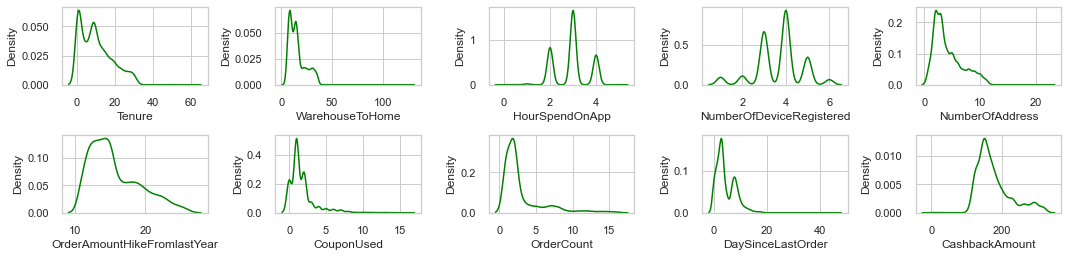

In [217]:
plt.figure(figsize=(15, 5))
for i in range(0, len(kontinu_interval)):
    plt.subplot(3, 5, i+1)
    sns.kdeplot(x=df[kontinu_interval[i]], color='green')
    plt.xlabel(kontinu_interval[i])
    plt.tight_layout()
plt.show()

In [218]:
# cek jumlah missing data setelah preprocessing
df.isna().sum()

CustomerID                     0
Churn                          0
Tenure                         0
PreferredLoginDevice           0
CityTier                       0
WarehouseToHome                0
PreferredPaymentMode           0
Gender                         0
HourSpendOnApp                 0
NumberOfDeviceRegistered       0
PreferedOrderCat               0
SatisfactionScore              0
MaritalStatus                  0
NumberOfAddress                0
Complain                       0
OrderAmountHikeFromlastYear    0
CouponUsed                     0
OrderCount                     0
DaySinceLastOrder              0
CashbackAmount                 0
dtype: int64

In [219]:
df.head(5)

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,9.0,Mobile Phone,1,8.0,UPI,Male,3.0,4,Mobile Phone,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,9.0,Mobile Phone,1,30.0,Debit Card,Male,2.0,4,Mobile Phone,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Mobile Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Mobile Phone,1,12.0,Credit Card,Male,3.0,3,Mobile Phone,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


### B. Handle Duplicated Data

In [220]:
df.duplicated().sum()

0

### C. Handle outliers

In [221]:
df.dtypes

CustomerID                       int64
Churn                            int64
Tenure                         float64
PreferredLoginDevice            object
CityTier                         int64
WarehouseToHome                float64
PreferredPaymentMode            object
Gender                          object
HourSpendOnApp                 float64
NumberOfDeviceRegistered         int64
PreferedOrderCat                object
SatisfactionScore                int64
MaritalStatus                   object
NumberOfAddress                  int64
Complain                         int64
OrderAmountHikeFromlastYear    float64
CouponUsed                     float64
OrderCount                     float64
DaySinceLastOrder              float64
CashbackAmount                 float64
dtype: object

In [222]:
df.head(5)

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,9.0,Mobile Phone,1,8.0,UPI,Male,3.0,4,Mobile Phone,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,9.0,Mobile Phone,1,30.0,Debit Card,Male,2.0,4,Mobile Phone,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Mobile Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Mobile Phone,1,12.0,Credit Card,Male,3.0,3,Mobile Phone,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


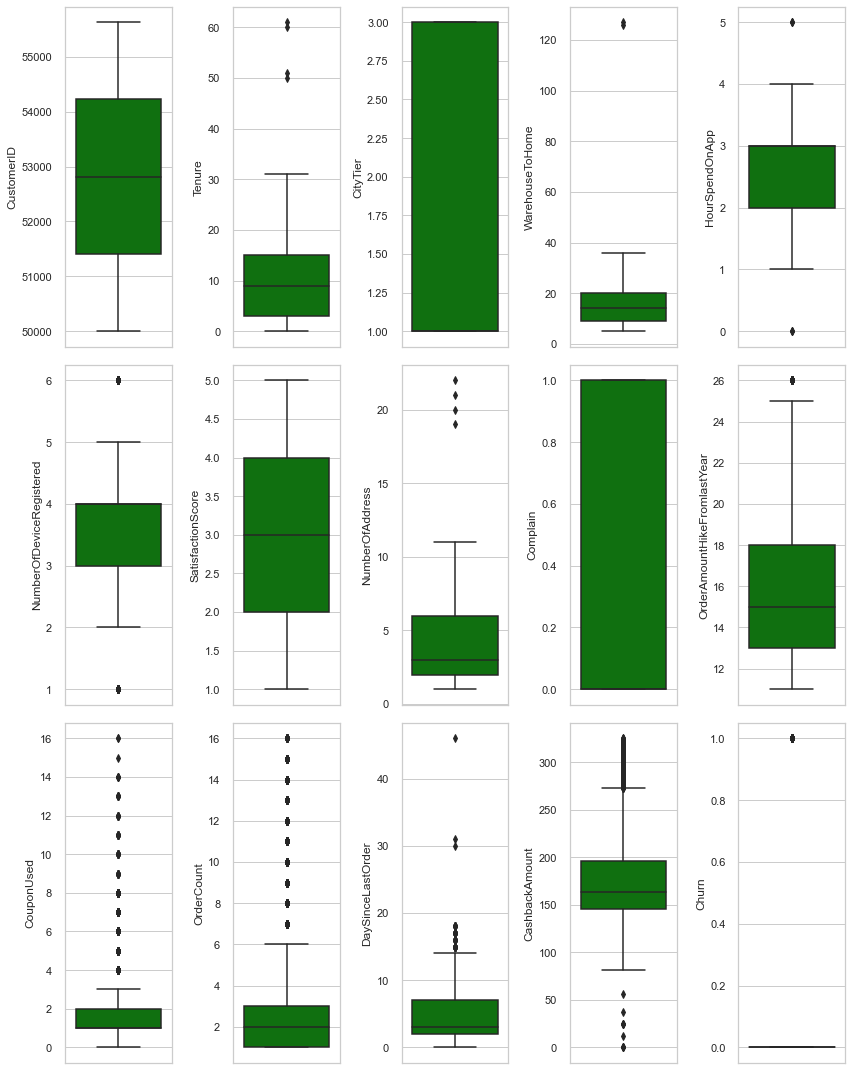

In [223]:
plt.figure(figsize=(12, 20))
for i in range(0, len(nums)):
    plt.subplot(4, int(len(nums)/3), i+1)
    sns.boxplot(y=df[nums[i]], color='green', orient='v')
    plt.tight_layout()
plt.show()

In [224]:
df.head(5)

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,9.0,Mobile Phone,1,8.0,UPI,Male,3.0,4,Mobile Phone,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,9.0,Mobile Phone,1,30.0,Debit Card,Male,2.0,4,Mobile Phone,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Mobile Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Mobile Phone,1,12.0,Credit Card,Male,3.0,3,Mobile Phone,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


In [225]:
from scipy import stats

print(f'Jumlah baris sebelum memfilter outlier: {len(df)}')

filtered_entries = np.array([True] * len(df))
columns_exclude = nums[:-1]

for col in columns_exclude:
    zscore = abs(stats.zscore(df[col])) # hitung absolute z-scorenya
    filtered_entries = (zscore < 3) & filtered_entries # keep yang kurang dari 3 absolute z-scorenya
    
df = df[filtered_entries] # filter, cuma ambil yang z-scorenya dibawah 3

print(f'Jumlah baris setelah memfilter outlier: {len(df)}')

Jumlah baris sebelum memfilter outlier: 5630
Jumlah baris setelah memfilter outlier: 5350


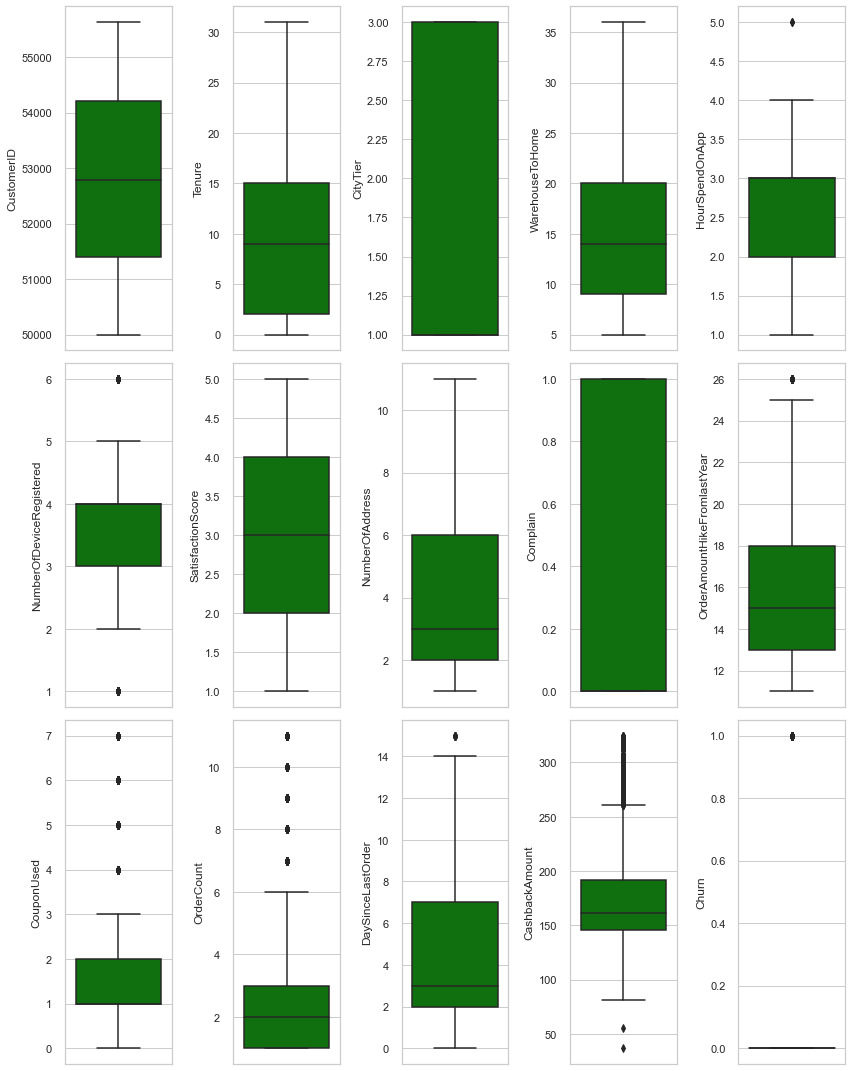

In [226]:
plt.figure(figsize=(12, 20))
for i in range(0, len(nums)):
    plt.subplot(4, int(len(nums)/3), i+1)
    sns.boxplot(y=df[nums[i]], color='green', orient='v')
    plt.tight_layout()
plt.show()

### D. Features Transformations

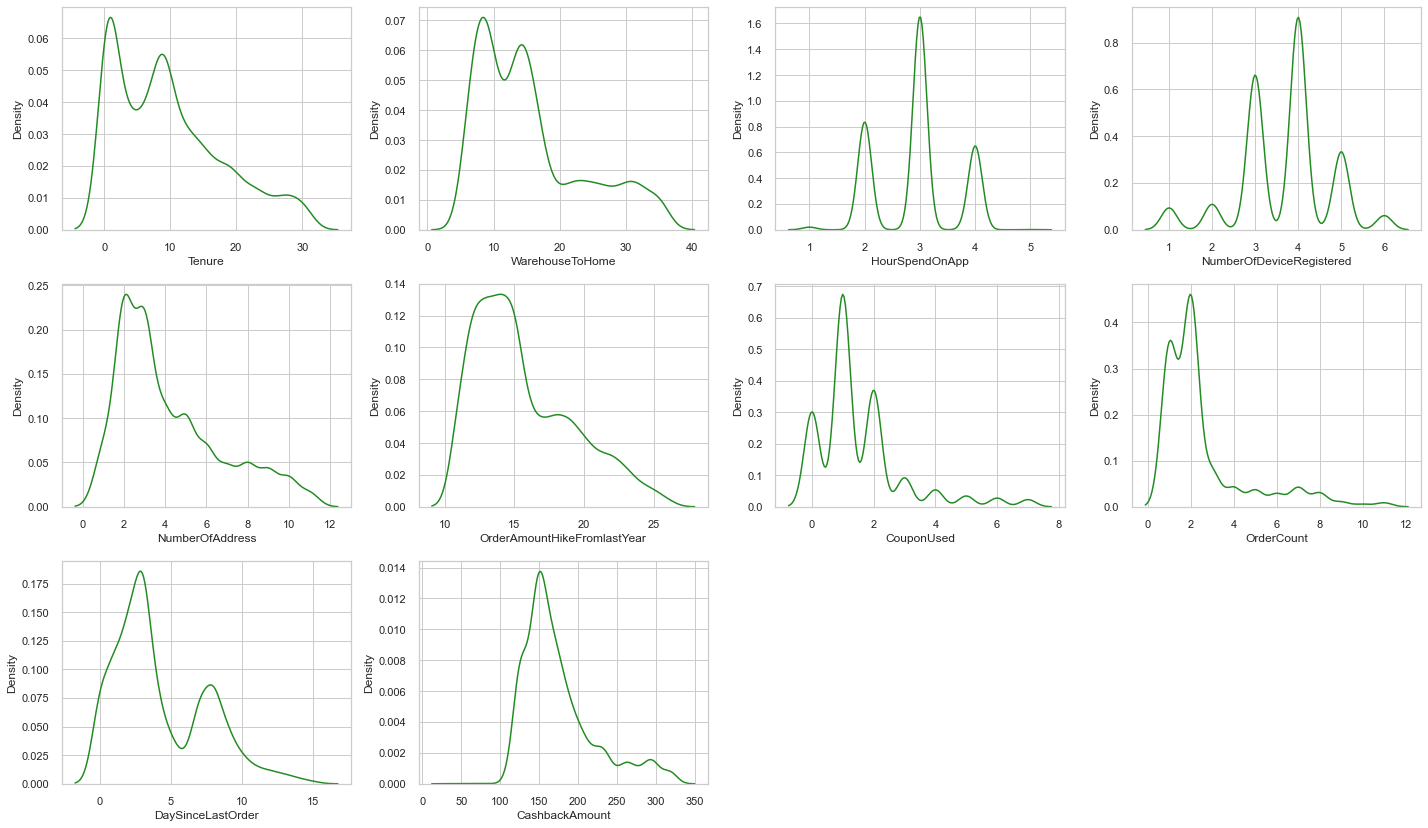

In [227]:
#Melihat behavior dari setiap fitur untuk menentukan jenis imputasi yang akan digunakan
features = kontinu_interval
plt.figure(figsize=(20, 15))
for i in range(0, len(features)):
  plt.subplot(4, 4, i+1)
  sns.kdeplot(x=df[features[i]], color='forestgreen')
  plt.xlabel(features[i])
  plt.tight_layout()

In [228]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,5350.0,52802.826168,1627.280475,50001.0,51394.25,52784.50,54208.75,55630.00
Churn,5350.0,0.170467,0.376078,0.0,0.00,0.00,0.00,1.00
Tenure,5350.0,9.804112,8.178609,0.0,2.00,9.00,15.00,31.00
CityTier,5350.0,1.652710,0.913816,1.0,1.00,1.00,3.00,3.00
WarehouseToHome,5350.0,15.541308,8.066006,5.0,9.00,14.00,20.00,36.00
HourSpendOnApp,5350.0,2.929720,0.701942,1.0,2.00,3.00,3.00,5.00
NumberOfDeviceRegistered,5350.0,3.675140,1.026057,1.0,3.00,4.00,4.00,6.00
SatisfactionScore,5350.0,3.056449,1.378802,1.0,2.00,3.00,4.00,5.00
NumberOfAddress,5350.0,4.196449,2.544520,1.0,2.00,3.00,6.00,11.00
Complain,5350.0,0.286355,0.452100,0.0,0.00,0.00,1.00,1.00


### Feature Transformations

In [229]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5350 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5350 non-null   int64  
 1   Churn                        5350 non-null   int64  
 2   Tenure                       5350 non-null   float64
 3   PreferredLoginDevice         5350 non-null   object 
 4   CityTier                     5350 non-null   int64  
 5   WarehouseToHome              5350 non-null   float64
 6   PreferredPaymentMode         5350 non-null   object 
 7   Gender                       5350 non-null   object 
 8   HourSpendOnApp               5350 non-null   float64
 9   NumberOfDeviceRegistered     5350 non-null   int64  
 10  PreferedOrderCat             5350 non-null   object 
 11  SatisfactionScore            5350 non-null   int64  
 12  MaritalStatus                5350 non-null   object 
 13  NumberOfAddress   

In [230]:
df_before_norm = df.copy()

In [231]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,5350.0,52802.826168,1627.280475,50001.0,51394.25,52784.50,54208.75,55630.00
Churn,5350.0,0.170467,0.376078,0.0,0.00,0.00,0.00,1.00
Tenure,5350.0,9.804112,8.178609,0.0,2.00,9.00,15.00,31.00
CityTier,5350.0,1.652710,0.913816,1.0,1.00,1.00,3.00,3.00
WarehouseToHome,5350.0,15.541308,8.066006,5.0,9.00,14.00,20.00,36.00
HourSpendOnApp,5350.0,2.929720,0.701942,1.0,2.00,3.00,3.00,5.00
NumberOfDeviceRegistered,5350.0,3.675140,1.026057,1.0,3.00,4.00,4.00,6.00
SatisfactionScore,5350.0,3.056449,1.378802,1.0,2.00,3.00,4.00,5.00
NumberOfAddress,5350.0,4.196449,2.544520,1.0,2.00,3.00,6.00,11.00
Complain,5350.0,0.286355,0.452100,0.0,0.00,0.00,1.00,1.00


### E. Feature Encoding

In [232]:
df.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,9.0,Mobile Phone,1,8.0,UPI,Male,3.0,4,Mobile Phone,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,9.0,Mobile Phone,1,30.0,Debit Card,Male,2.0,4,Mobile Phone,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Mobile Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Mobile Phone,1,12.0,Credit Card,Male,3.0,3,Mobile Phone,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


In [233]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5350 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5350 non-null   int64  
 1   Churn                        5350 non-null   int64  
 2   Tenure                       5350 non-null   float64
 3   PreferredLoginDevice         5350 non-null   object 
 4   CityTier                     5350 non-null   int64  
 5   WarehouseToHome              5350 non-null   float64
 6   PreferredPaymentMode         5350 non-null   object 
 7   Gender                       5350 non-null   object 
 8   HourSpendOnApp               5350 non-null   float64
 9   NumberOfDeviceRegistered     5350 non-null   int64  
 10  PreferedOrderCat             5350 non-null   object 
 11  SatisfactionScore            5350 non-null   int64  
 12  MaritalStatus                5350 non-null   object 
 13  NumberOfAddress   

In [234]:
#Buat List Kolom Dengan Tipe Data Object
columns_object = []

for i in df.columns:
    if df[i].dtype == 'object':
        kolom_object = i
        columns_object.append(kolom_object)

#cek isi kolom object
columns_object

['PreferredLoginDevice',
 'PreferredPaymentMode',
 'Gender',
 'PreferedOrderCat',
 'MaritalStatus']

In [235]:
#Lakukan Label Encoder dan One_Hot_Encoding
from sklearn import preprocessing 
  
label_encoder = preprocessing.LabelEncoder()
df['PreferredLoginDevice'] = label_encoder.fit_transform(df['PreferredLoginDevice'])
df['Gender'] = label_encoder.fit_transform(df['Gender'])
df = pd.get_dummies(df, columns=['PreferredPaymentMode', 'PreferedOrderCat', 'MaritalStatus'], dtype=int)

In [236]:
df.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,Gender,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,...,PreferredPaymentMode_E wallet,PreferredPaymentMode_UPI,PreferedOrderCat_Fashion,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile Phone,PreferedOrderCat_Others,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,50001,1,4.0,1,3,6.0,0,3.0,3,2,...,0,0,0,0,1,0,0,0,0,1
1,50002,1,9.0,1,1,8.0,1,3.0,4,3,...,0,1,0,0,0,1,0,0,0,1
2,50003,1,9.0,1,1,30.0,1,2.0,4,3,...,0,0,0,0,0,1,0,0,0,1
3,50004,1,0.0,1,3,15.0,1,2.0,4,5,...,0,0,0,0,1,0,0,0,0,1
4,50005,1,0.0,1,1,12.0,1,3.0,3,5,...,0,0,0,0,0,1,0,0,0,1


In [237]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5350 entries, 0 to 5629
Data columns (total 30 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   CustomerID                             5350 non-null   int64  
 1   Churn                                  5350 non-null   int64  
 2   Tenure                                 5350 non-null   float64
 3   PreferredLoginDevice                   5350 non-null   int64  
 4   CityTier                               5350 non-null   int64  
 5   WarehouseToHome                        5350 non-null   float64
 6   Gender                                 5350 non-null   int64  
 7   HourSpendOnApp                         5350 non-null   float64
 8   NumberOfDeviceRegistered               5350 non-null   int64  
 9   SatisfactionScore                      5350 non-null   int64  
 10  NumberOfAddress                        5350 non-null   int64  
 11  Comp

In [238]:
df_before_norm = df.copy()

### F. Handle class imbalance

In [239]:
#Cek Jumlah Data Target (Y_train)
X = df.drop(['Churn'], axis=1)
Y = df['Churn']

target = Y.value_counts().to_list()
sum_target = int(target[0] + target[1])
percentage_0 = (int(target[0]) / sum_target) * 100
percentage_1 = (int(target[1]) / sum_target) * 100

In [240]:
Y_target = pd.DataFrame({'Churn' : ['Yes', 'No'],
                              'Total' : [target[1], target[0]],
                              'Percentage' : [round(percentage_1, 1), round(percentage_0, 1)]
                              })
Y_target

,Churn,Total,Percentage
0,Yes,912,17.0
1,No,4438,83.0


- Kita akan melakukan Handle class imbalance dengan teknik oversampling, ini dilakukan karena pada data target rasio antara customer churn dengan customer tidak churn adalal 1 : 4,7
- Dalam persentase total Churn Yes = 17.3% dan Churn No = 83%

In [241]:
#Lakukan Teknik Over_sampling dengan SMOTE untuk mengatasi class imbalance 
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy=0.33, random_state=42)
X, Y = smote.fit_resample(X, Y)

In [242]:
#Cek Kembali Jumlah Data Target (Y_train) Setelah Dilakukan Oversampling
df_target_result = Y.value_counts().to_list()
df_target_result_smote = pd.DataFrame({'Churn' : ['No', 'Yes'],
                                    'Total' : [df_target_result[0], df_target_result[1]]})
df_target_result_smote

,Churn,Total
0,No,4438
1,Yes,1464


# Feature Engineering 

### A. Feature Selection

In [243]:
corr_matrix = df.corr()
churn_corr_vector = corr_matrix['Churn'].sort_values(ascending = False)
churn_corr_vector

Churn                                    1.000000
Complain                                 0.258223
PreferedOrderCat_Mobile Phone            0.216724
MaritalStatus_Single                     0.180288
NumberOfDeviceRegistered                 0.118346
SatisfactionScore                        0.111592
CityTier                                 0.090698
WarehouseToHome                          0.077735
PreferredPaymentMode_Cash on Delivery    0.066650
PreferredPaymentMode_E wallet            0.062879
NumberOfAddress                          0.040018
Gender                                   0.028538
HourSpendOnApp                           0.024854
PreferredPaymentMode_UPI                 0.006876
OrderAmountHikeFromlastYear              0.000330
CouponUsed                              -0.003974
PreferedOrderCat_Fashion                -0.013145
CustomerID                              -0.016067
OrderCount                              -0.021347
MaritalStatus_Divorced                  -0.027674


Text(0.5, 1.0, 'Relation Between Features and target')

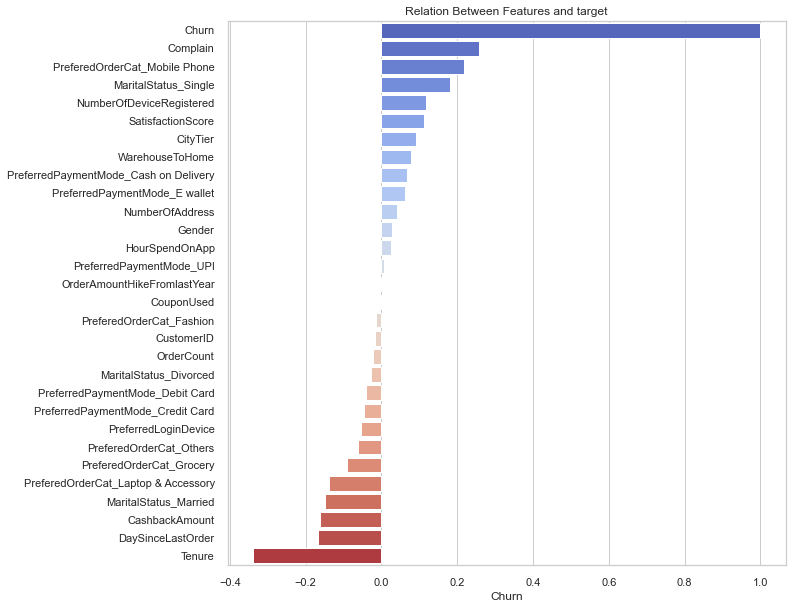

In [244]:
plt.figure(figsize = (10,10))
sns.barplot(x = churn_corr_vector , y = churn_corr_vector.index , palette = 'coolwarm')
plt.title('Relation Between Features and target')

Feature yang dilakukan adalah membuang beberapa kolom yang tidak dibutuhkan seperti : 
- CustomerID

In [245]:
X.head()

,CustomerID,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,Gender,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,...,PreferredPaymentMode_E wallet,PreferredPaymentMode_UPI,PreferedOrderCat_Fashion,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile Phone,PreferedOrderCat_Others,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,50001,4.0,1,3,6.0,0,3.0,3,2,9,...,0,0,0,0,1,0,0,0,0,1
1,50002,9.0,1,1,8.0,1,3.0,4,3,7,...,0,1,0,0,0,1,0,0,0,1
2,50003,9.0,1,1,30.0,1,2.0,4,3,6,...,0,0,0,0,0,1,0,0,0,1
3,50004,0.0,1,3,15.0,1,2.0,4,5,8,...,0,0,0,0,1,0,0,0,0,1
4,50005,0.0,1,1,12.0,1,3.0,3,5,3,...,0,0,0,0,0,1,0,0,0,1


In [246]:
#Buang Feature Yang dianggap Tidak Penting (CustomerID)
X = X.drop(['CustomerID'], axis=1)

In [247]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5902 entries, 0 to 5901
Data columns (total 28 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Tenure                                 5902 non-null   float64
 1   PreferredLoginDevice                   5902 non-null   int64  
 2   CityTier                               5902 non-null   int64  
 3   WarehouseToHome                        5902 non-null   float64
 4   Gender                                 5902 non-null   int64  
 5   HourSpendOnApp                         5902 non-null   float64
 6   NumberOfDeviceRegistered               5902 non-null   int64  
 7   SatisfactionScore                      5902 non-null   int64  
 8   NumberOfAddress                        5902 non-null   int64  
 9   Complain                               5902 non-null   int64  
 10  OrderAmountHikeFromlastYear            5902 non-null   float64
 11  Coup

### B. Feature Extraction

Semua feature sudah tepat dan sudah cukup untuk dilakukan modeling, jadi tidak ada feature extraction

### C. Tambahan Feature

Terdapat beberapa feature tambahan yang dapat dilakukan atau ditambahkan dalam dataset ini berikut daftar tambahan feature : 
- **AverageOrderAmoun** <br>
Merupakan rata - rata jumlah pesanan pada setiap customer selama periode tertentu. 
- **ComplaintsPerOrder** <br>
Merupakan rasio complain customer terhadap jumlah order yang dilakukan
- **CouponUsageRate** <br>
Merupakan rasio penggunaan coupon terhadap jumlah order yang dilakukan
- **OrderFrequency** <br>
Merupakan perhitungan seberapa sering customer melakukan order.

# Modeling & Evaluation

## Modeling

In [248]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5902 entries, 0 to 5901
Data columns (total 28 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Tenure                                 5902 non-null   float64
 1   PreferredLoginDevice                   5902 non-null   int64  
 2   CityTier                               5902 non-null   int64  
 3   WarehouseToHome                        5902 non-null   float64
 4   Gender                                 5902 non-null   int64  
 5   HourSpendOnApp                         5902 non-null   float64
 6   NumberOfDeviceRegistered               5902 non-null   int64  
 7   SatisfactionScore                      5902 non-null   int64  
 8   NumberOfAddress                        5902 non-null   int64  
 9   Complain                               5902 non-null   int64  
 10  OrderAmountHikeFromlastYear            5902 non-null   float64
 11  Coup

In [249]:
X.describe().T

,count,mean,std,min,25%,50%,75%,max
Tenure,5902.0,9.224245,8.114106,0.0,1.191244,8.0,14.000000,31.00
PreferredLoginDevice,5902.0,0.684514,0.464749,0.0,0.000000,1.0,1.000000,1.00
CityTier,5902.0,1.642833,0.901438,1.0,1.000000,1.0,3.000000,3.00
WarehouseToHome,5902.0,15.650350,7.961519,5.0,9.000000,14.0,20.000000,36.00
Gender,5902.0,0.580651,0.493494,0.0,0.000000,1.0,1.000000,1.00
HourSpendOnApp,5902.0,2.936724,0.693466,1.0,2.000000,3.0,3.000000,5.00
NumberOfDeviceRegistered,5902.0,3.675025,1.008916,1.0,3.000000,4.0,4.000000,6.00
SatisfactionScore,5902.0,3.062352,1.357041,1.0,2.000000,3.0,4.000000,5.00
NumberOfAddress,5902.0,4.177228,2.510666,1.0,2.000000,3.0,6.000000,11.00
Complain,5902.0,0.284310,0.451124,0.0,0.000000,0.0,1.000000,1.00


#### A. Split Data Train & Test

In [250]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
X = X
Y = Y

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [251]:
split_list = [X_train, X_test, Y_train, Y_test]

# Looping untuk mengecek ukuran variabel dan nama variabel
for var in split_list:
    # Mendapatkan nama variabel dengan menggunakan globals() atau locals()
    var_name = [name for name, value in locals().items() if value is var][0]

    # Menggunakan shape untuk mendapatkan ukuran variabel
    var_shape = var.shape

    print(f"Variable name: {var_name}, Shape: {var_shape}")

Variable name: X_train, Shape: (4721, 28)
Variable name: X_test, Shape: (1181, 28)
Variable name: Y_train, Shape: (4721,)
Variable name: Y_test, Shape: (1181,)


#### B.Modeling

In [252]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [253]:
logisreg_clf = LogisticRegression(random_state=42)
svm_clf = SVC(random_state=42, probability=True)
dt_clf = DecisionTreeClassifier(random_state=42)
rf_clf = RandomForestClassifier(random_state=42)
XGB_clf = XGBClassifier(random_state=42)
ada_clf = AdaBoostClassifier(random_state=42)
knn_clf = KNeighborsClassifier()

In [254]:
MN = MinMaxScaler()
X_train_scaled = MN.fit_transform(X_train)
X_test_scaled = MN.transform(X_test)

clf_list = [logisreg_clf, svm_clf, dt_clf, rf_clf, XGB_clf, ada_clf, knn_clf]
clf_name_list = ['Logistic Regression', 'Support Vector Machine', 'Decision Tree', 'Random Forest', 'XGBClassifier' , 'AdaBoostClassifier', 'KNN Classifier']

for clf in clf_list:
    clf.fit(X_train,Y_train)

In [255]:
evaluation_results = []
for model, name in zip(clf_list, clf_name_list):
    result = {
        'Accuracy (Test Set)': accuracy_score(Y_test, model.predict(X_test)),
        'Accuracy (Train Set)': accuracy_score(Y_train, model.predict(X_train)),
        'Precision (Train Set)': precision_score(Y_train, model.predict(X_train)),
        'Precision (Test Set)': precision_score(Y_test, model.predict(X_test)),
        'Recall (Train Set)': recall_score(Y_train, model.predict(X_train)),
        'Recall (Test Set)': recall_score(Y_test, model.predict(X_test)),
        'F1-Score (Train Set)': f1_score(Y_train, model.predict(X_train)),
        'F1-Score (Test Set)': f1_score(Y_test, model.predict(X_test)),
        'ROC AUC (Test Set)': roc_auc_score(Y_test, model.predict_proba(X_test)[:, 1]),
        'ROC AUC (Train Set)': roc_auc_score(Y_train, model.predict_proba(X_train)[:, 1])
    }
    evaluation_results.append(result)

all_models = pd.DataFrame(evaluation_results, index=clf_name_list)
all_models


,Accuracy (Test Set),Accuracy (Train Set),Precision (Train Set),Precision (Test Set),Recall (Train Set),Recall (Test Set),F1-Score (Train Set),F1-Score (Test Set),ROC AUC (Test Set),ROC AUC (Train Set)
Logistic Regression,0.868755,0.861894,0.767137,0.772532,0.643824,0.638298,0.700092,0.699029,0.911438,0.901607
Support Vector Machine,0.761219,0.749629,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.870865,0.853048
Decision Tree,0.932261,1.000000,1.000000,0.876866,1.000000,0.833333,1.000000,0.854545,0.898313,1.000000
Random Forest,0.959356,1.000000,1.000000,0.979508,1.000000,0.847518,1.000000,0.908745,0.993509,1.000000
XGBClassifier,0.976291,1.000000,1.000000,0.977444,1.000000,0.921986,1.000000,0.948905,0.996115,1.000000
AdaBoostClassifier,0.895851,0.887947,0.811249,0.802281,0.719966,0.748227,0.762887,0.774312,0.945629,0.940683
KNN Classifier,0.839966,0.898750,0.798305,0.667870,0.796954,0.656028,0.797629,0.661896,0.876884,0.959696


In [256]:
# Create in percentage
evaluation_results = []
for model, name in zip(clf_list, clf_name_list):
    result = {
        'Accuracy (Test Set)': accuracy_score(Y_test, model.predict(X_test)),
        'Accuracy (Train Set)': accuracy_score(Y_train, model.predict(X_train)),
        'Precision (Train Set)': precision_score(Y_train, model.predict(X_train)),
        'Precision (Test Set)': precision_score(Y_test, model.predict(X_test)),
        'Recall (Train Set)': recall_score(Y_train, model.predict(X_train)),
        'Recall (Test Set)': recall_score(Y_test, model.predict(X_test)),
        'F1-Score (Train Set)': f1_score(Y_train, model.predict(X_train)),
        'F1-Score (Test Set)': f1_score(Y_test, model.predict(X_test)),
        'ROC AUC (Test Set)': roc_auc_score(Y_test, model.predict_proba(X_test)[:, 1]),
        'ROC AUC (Train Set)': roc_auc_score(Y_train, model.predict_proba(X_train)[:, 1])
    }
    
    evaluation_results.append(result)
all_models = pd.DataFrame(evaluation_results, index=clf_name_list)
all_models


,Accuracy (Test Set),Accuracy (Train Set),Precision (Train Set),Precision (Test Set),Recall (Train Set),Recall (Test Set),F1-Score (Train Set),F1-Score (Test Set),ROC AUC (Test Set),ROC AUC (Train Set)
Logistic Regression,0.868755,0.861894,0.767137,0.772532,0.643824,0.638298,0.700092,0.699029,0.911438,0.901607
Support Vector Machine,0.761219,0.749629,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.870865,0.853048
Decision Tree,0.932261,1.000000,1.000000,0.876866,1.000000,0.833333,1.000000,0.854545,0.898313,1.000000
Random Forest,0.959356,1.000000,1.000000,0.979508,1.000000,0.847518,1.000000,0.908745,0.993509,1.000000
XGBClassifier,0.976291,1.000000,1.000000,0.977444,1.000000,0.921986,1.000000,0.948905,0.996115,1.000000
AdaBoostClassifier,0.895851,0.887947,0.811249,0.802281,0.719966,0.748227,0.762887,0.774312,0.945629,0.940683
KNN Classifier,0.839966,0.898750,0.798305,0.667870,0.796954,0.656028,0.797629,0.661896,0.876884,0.959696


Precision: 96.67 %


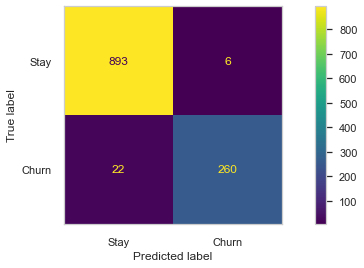

In [257]:
# create a confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix


# plot confusion matrix make it bigger
plot_confusion_matrix(XGB_clf, X_test, Y_test,  display_labels=['Stay', 'Churn'])
plt.grid(False)
print("Precision: %.2f" % (precision_score(Y_test, best_xgb_model.predict(X_test)) * 100), "%")

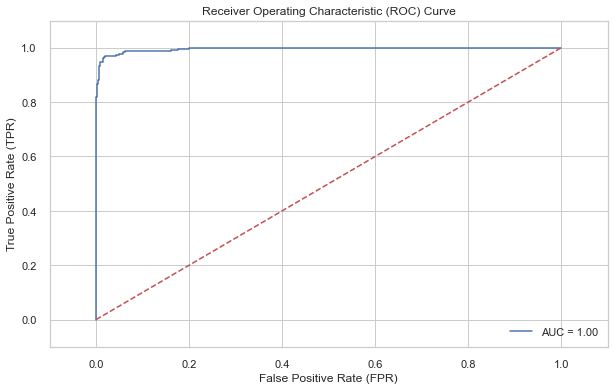

In [258]:
# plot roc_auc score
from sklearn.metrics import roc_curve, roc_auc_score
y_pred_proba = XGB_clf.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(Y_test, y_pred_proba)
roc_auc = roc_auc_score(Y_test, y_pred_proba)
plt.figure(figsize=(10, 6))
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.ylabel('True Positive Rate (TPR)')
plt.xlabel('False Positive Rate (FPR)')
plt.show()


In [259]:
# Convert to excel
all_models.to_excel('all_models.xlsx')

In [260]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, RocCurveDisplay, confusion_matrix

#### AUTO ML

In [261]:
from pycaret.classification import *


In [262]:
model_setup = setup(df , target = 'Churn' , train_size=0.7)

,Description,Value
0,Session id,4481
1,Target,Churn
2,Target type,Binary
3,Original data shape,"(5350, 30)"
4,Transformed data shape,"(5350, 30)"
5,Transformed train set shape,"(3744, 30)"
6,Transformed test set shape,"(1606, 30)"
7,Numeric features,29
8,Preprocess,True
9,Imputation type,simple


In [263]:
best_model = compare_models()


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
xgboost,Extreme Gradient Boosting,0.9530,0.9710,0.8119,0.9051,0.8541,0.8262,0.8292,0.1040
lightgbm,Light Gradient Boosting Machine,0.9519,0.9745,0.8009,0.9077,0.8493,0.8209,0.8243,0.2650
et,Extra Trees Classifier,0.9511,0.9852,0.7585,0.9437,0.8401,0.8117,0.8190,0.1870
rf,Random Forest Classifier,0.9450,0.9739,0.7382,0.9244,0.8196,0.7877,0.7954,0.1910
dt,Decision Tree Classifier,0.9204,0.8661,0.7836,0.7589,0.7703,0.7222,0.7229,0.0600
gbc,Gradient Boosting Classifier,0.9201,0.9412,0.6615,0.8402,0.7368,0.6908,0.6996,0.2460
ada,Ada Boost Classifier,0.8953,0.9189,0.5895,0.7416,0.6548,0.5944,0.6009,0.1110
lda,Linear Discriminant Analysis,0.8918,0.8887,0.5190,0.7710,0.6187,0.5588,0.5745,0.0210
ridge,Ridge Classifier,0.8753,0.0000,0.3231,0.8480,0.4638,0.4104,0.4731,0.0270
lr,Logistic Regression,0.8555,0.8388,0.3070,0.6976,0.4091,0.3431,0.3832,1.7810


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [264]:
evaluate_model(best_model)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

#### C. Model Evaluation

In [265]:
data_baru = pd.DataFrame(all_models)
data_baru

,Accuracy (Test Set),Accuracy (Train Set),Precision (Train Set),Precision (Test Set),Recall (Train Set),Recall (Test Set),F1-Score (Train Set),F1-Score (Test Set),ROC AUC (Test Set),ROC AUC (Train Set)
Logistic Regression,0.868755,0.861894,0.767137,0.772532,0.643824,0.638298,0.700092,0.699029,0.911438,0.901607
Support Vector Machine,0.761219,0.749629,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.870865,0.853048
Decision Tree,0.932261,1.000000,1.000000,0.876866,1.000000,0.833333,1.000000,0.854545,0.898313,1.000000
Random Forest,0.959356,1.000000,1.000000,0.979508,1.000000,0.847518,1.000000,0.908745,0.993509,1.000000
XGBClassifier,0.976291,1.000000,1.000000,0.977444,1.000000,0.921986,1.000000,0.948905,0.996115,1.000000
AdaBoostClassifier,0.895851,0.887947,0.811249,0.802281,0.719966,0.748227,0.762887,0.774312,0.945629,0.940683
KNN Classifier,0.839966,0.898750,0.798305,0.667870,0.796954,0.656028,0.797629,0.661896,0.876884,0.959696


In [266]:
data_baru.T

,Logistic Regression,Support Vector Machine,Decision Tree,Random Forest,XGBClassifier,AdaBoostClassifier,KNN Classifier
Accuracy (Test Set),0.868755,0.761219,0.932261,0.959356,0.976291,0.895851,0.839966
Accuracy (Train Set),0.861894,0.749629,1.000000,1.000000,1.000000,0.887947,0.898750
Precision (Train Set),0.767137,0.000000,1.000000,1.000000,1.000000,0.811249,0.798305
Precision (Test Set),0.772532,0.000000,0.876866,0.979508,0.977444,0.802281,0.667870
Recall (Train Set),0.643824,0.000000,1.000000,1.000000,1.000000,0.719966,0.796954
Recall (Test Set),0.638298,0.000000,0.833333,0.847518,0.921986,0.748227,0.656028
F1-Score (Train Set),0.700092,0.000000,1.000000,1.000000,1.000000,0.762887,0.797629
F1-Score (Test Set),0.699029,0.000000,0.854545,0.908745,0.948905,0.774312,0.661896
ROC AUC (Test Set),0.911438,0.870865,0.898313,0.993509,0.996115,0.945629,0.876884
ROC AUC (Train Set),0.901607,0.853048,1.000000,1.000000,1.000000,0.940683,0.959696


### D. Model Evaluation: Apakah model sudah best-fit? Hindari Overfit/Underfit. Validasi dengan cross-validation

In [267]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import cross_val_score

# Define your classification model as 'model' here

# Specify the number of folds for k-fold cross-validation
num_folds = 10

accuracy_list = []
precision_list = []
recall_list = []
f1score_list = []
roc_auc_list = []

# Create a function for k-fold cross-validation
def k_fold_cross_validation(model, num_folds=10, random_state=42):
    # Perform k-fold cross-validation and get scores for each fold
    scores = cross_val_score(model, X_train, Y_train, cv=num_folds)
    
    # Collect the accuracy scores for each fold
    accuracy_list.extend(scores)

    # You can calculate other metrics as well, similar to your existing code
    # For precision, recall, F1-score, and ROC AUC, you'll need to define a scoring function

    # Precision
    precision = cross_val_score(model, X_train, Y_train, cv=num_folds, scoring='precision')
    precision_list.extend(precision)

    # Recall
    recall = cross_val_score(model, X_train, Y_train, cv=num_folds, scoring='recall')
    recall_list.extend(recall)

    # F1-score
    f1 = cross_val_score(model, X_train, Y_train, cv=num_folds, scoring='f1')
    f1score_list.extend(f1)

    # ROC AUC
    roc_auc = cross_val_score(model, X_train, Y_train, cv=num_folds, scoring='roc_auc')
    roc_auc_list.extend(roc_auc)

    # Print the metrics for each fold
    for fold, score in enumerate(scores, 1):
        print(f"Fold {fold}:")
        print(f"Accuracy: {score:.2f}")
        print(f"Precision: {precision[fold - 1]:.2f}")
        print(f"Recall: {recall[fold - 1]:.2f}")
        print(f"F1-Score: {f1[fold - 1]:.2f}")
        print(f"ROC AUC: {roc_auc[fold - 1]:.2f}")
        print()  # Add an empty line between folds

#### Cross Validation XGBClassifier

In [268]:
# Call the k-fold cross-validation function
k_fold_cross_validation(XGBClassifier(random_state=42), num_folds)

Fold 1:
Accuracy: 0.95
Precision: 0.92
Recall: 0.89
F1-Score: 0.91
ROC AUC: 0.99

Fold 2:
Accuracy: 0.98
Precision: 0.97
Recall: 0.95
F1-Score: 0.96
ROC AUC: 0.99

Fold 3:
Accuracy: 0.98
Precision: 0.96
Recall: 0.95
F1-Score: 0.95
ROC AUC: 0.99

Fold 4:
Accuracy: 0.97
Precision: 0.93
Recall: 0.94
F1-Score: 0.94
ROC AUC: 0.99

Fold 5:
Accuracy: 0.96
Precision: 0.94
Recall: 0.88
F1-Score: 0.91
ROC AUC: 0.98

Fold 6:
Accuracy: 0.97
Precision: 0.95
Recall: 0.92
F1-Score: 0.93
ROC AUC: 0.99

Fold 7:
Accuracy: 0.97
Precision: 0.97
Recall: 0.92
F1-Score: 0.94
ROC AUC: 0.98

Fold 8:
Accuracy: 0.97
Precision: 0.96
Recall: 0.92
F1-Score: 0.94
ROC AUC: 1.00

Fold 9:
Accuracy: 0.96
Precision: 0.95
Recall: 0.86
F1-Score: 0.91
ROC AUC: 0.98

Fold 10:
Accuracy: 0.97
Precision: 0.97
Recall: 0.93
F1-Score: 0.95
ROC AUC: 0.99



In [269]:
std_acc = np.std(accuracy_list)
std_prec = np.std(precision_list)
std_rec = np.std(recall_list)
std_f1 = np.std(f1score_list)
std_roc = np.std(roc_auc_list)

data_cross_val = pd.DataFrame({'Model' : ["XGBClassifier"],
                              'Std Accuracy' :[std_acc],
                              'Std Precison' :[std_prec],
                              'Std Recall' :[std_rec],
                              'Std F1_Score' :[std_f1],
                              'Std ROC_AUC' :[std_roc]})

In [270]:
metric_lists = [accuracy_list, precision_list, recall_list, f1score_list, roc_auc_list]
metric_names = ["Accuracy", "Precision", "Recall", "F1-Score", "ROC AUC"]

for metric_name, metric_list in zip(metric_names, metric_lists):
    metric_std = np.std(metric_list)
    print(f"{metric_name} Std Dev: {metric_std}")

Accuracy Std Dev: 0.009222277571872243
Precision Std Dev: 0.016771870749003485
Recall Std Dev: 0.02765511354756015
F1-Score Std Dev: 0.01929435623402268
ROC AUC Std Dev: 0.0052822364887366415


In [271]:
data_cross_val

,Model,Std Accuracy,Std Precison,Std Recall,Std F1_Score,Std ROC_AUC
0,XGBClassifier,0.009222,0.016772,0.027655,0.019294,0.005282


Standar Deviasi Akurasi: 0.008464

Standar deviasi untuk akurasi adalah 0.008464, yang berarti skor akurasi untuk setiap lipatan dalam validasi silang k-fold Anda relatif mendekati rata-rata akurasi. Standar deviasi rendah menunjukkan bahwa skor akurasi konsisten dan memiliki sedikit variasi antara lipatan yang berbeda.
Standar Deviasi Presisi: 0.020729

Standar deviasi untuk presisi adalah 0.020729, yang mengindikasikan bahwa skor presisi bervariasi lebih banyak dibandingkan dengan akurasi. Standar deviasi yang lebih tinggi berarti ada lebih banyak variasi dalam presisi di antara lipatan yang berbeda.

Standar Deviasi Recall: 0.025819

Standar deviasi untuk recall adalah 0.025819, yang menunjukkan bahwa skor recall lebih konsisten daripada presisi tetapi memiliki beberapa variasi. Ini kurang bervariasi dibandingkan dengan presisi tetapi masih menunjukkan variasi yang cukup.

Standar Deviasi F1-Score: 0.017843

Standar deviasi untuk F1-score adalah 0.017843, yang mengindikasikan bahwa skor F1 juga memiliki variasi moderat di antara lipatan yang berbeda. Metrik ini menggabungkan baik presisi dan recall, sehingga berada di antara standar deviasi dari kedua metrik tersebut.

Standar Deviasi ROC AUC: 0.004956

Standar deviasi untuk ROC AUC sangat rendah pada 0.004956. Ini berarti skor ROC AUC sangat konsisten dan memiliki sedikit variasi di antara lipatan yang berbeda, menunjukkan stabilitas yang tinggi dalam kinerja model untuk metrik ini.

Secara ringkas, standar deviasi yang lebih rendah (misalnya, untuk ROC AUC) menunjukkan bahwa nilai metrik lebih konsisten dan memiliki variasi yang lebih sedikit antara lipatan, sementara standar deviasi yang lebih tinggi (misalnya, untuk presisi) menunjukkan variasi yang lebih besar dalam nilai metrik di antara lipatan yang berbeda. Standar deviasi memberikan wawasan tentang stabilitas dan konsistensi kinerja model

### E. Hyperparameter Tuning

In [272]:
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint

# Define the parameter grid for random search
param_grid = {
    'n_estimators': randint(100, 1000),  # Number of boosting rounds
    'max_depth': randint(3, 10),  # Maximum depth of the trees
    'learning_rate': uniform(0.01, 0.3),  # Learning rate
    'subsample': uniform(0.6, 0.4),  # Fraction of samples used for each boosting round
    'colsample_bytree': uniform(0.6, 0.4),  # Fraction of features used for each boosting round
    'gamma': uniform(0, 1),  # Minimum loss reduction required to make a further partition on a leaf node
    'reg_alpha': uniform(0, 1),  # L1 regularization term on weights
    'reg_lambda': uniform(0, 1),  # L2 regularization term on weights
}

# Create the XGBoost classifier
xgb_model = xgb.XGBClassifier()

# Create the RandomizedSearchCV object
random_search = RandomizedSearchCV(
    xgb_model,
    param_distributions=param_grid,
    n_iter=100,  # Adjust the number of iterations as needed
    cv=10,  # Number of cross-validation folds
    scoring='roc_auc',  # Use an appropriate scoring metric
    random_state=42,
    n_jobs=-1  # Use multiple CPU cores for faster search
)

# Fit the RandomizedSearchCV to your data
random_search.fit(X_train, Y_train)  # Replace X and Y with your data

# Get the best hyperparameters
best_params = random_search.best_params_
print("Best Hyperparameters:", best_params)

# Train the XGBoost model with the best hyperparameters
best_xgb_model = xgb.XGBClassifier(**best_params)
xgb_param = best_xgb_model.fit(X_train, Y_train)  # Replace X and Y with your data

Best Hyperparameters: {'colsample_bytree': 0.9027996528688915, 'gamma': 0.04689646779121992, 'learning_rate': 0.0906017446075922, 'max_depth': 9, 'n_estimators': 253, 'reg_alpha': 0.49816518664589293, 'reg_lambda': 0.4762106967890142, 'subsample': 0.9325485960250005}


In [273]:
accuracy_list = []
precision_list = []
recall_list = []
f1score_list = []
roc_auc_list = []

In [274]:
k_fold_cross_validation(xgb_param)

Fold 1:
Accuracy: 0.96
Precision: 0.95
Recall: 0.87
F1-Score: 0.91
ROC AUC: 0.99

Fold 2:
Accuracy: 0.98
Precision: 0.98
Recall: 0.95
F1-Score: 0.97
ROC AUC: 1.00

Fold 3:
Accuracy: 0.97
Precision: 0.96
Recall: 0.92
F1-Score: 0.94
ROC AUC: 0.99

Fold 4:
Accuracy: 0.96
Precision: 0.93
Recall: 0.92
F1-Score: 0.92
ROC AUC: 0.99

Fold 5:
Accuracy: 0.96
Precision: 0.96
Recall: 0.86
F1-Score: 0.91
ROC AUC: 0.99

Fold 6:
Accuracy: 0.96
Precision: 0.95
Recall: 0.90
F1-Score: 0.93
ROC AUC: 0.99

Fold 7:
Accuracy: 0.98
Precision: 0.98
Recall: 0.92
F1-Score: 0.95
ROC AUC: 0.98

Fold 8:
Accuracy: 0.96
Precision: 0.97
Recall: 0.86
F1-Score: 0.91
ROC AUC: 1.00

Fold 9:
Accuracy: 0.95
Precision: 0.96
Recall: 0.85
F1-Score: 0.90
ROC AUC: 0.98

Fold 10:
Accuracy: 0.97
Precision: 0.96
Recall: 0.91
F1-Score: 0.94
ROC AUC: 0.99



In [275]:
std_acc = np.std(accuracy_list)
std_prec = np.std(precision_list)
std_rec = np.std(recall_list)
std_f1 = np.std(f1score_list)
std_roc = np.std(roc_auc_list)

data_cross_val_hyperparameter = pd.DataFrame({'Model' : ["XGBClassifier"],
                              'Std Accuracy' :[std_acc],
                              'Std Precison' :[std_prec],
                              'Std Recall' :[std_rec],
                              'Std F1_Score' :[std_f1],
                              'Std ROC_AUC' :[std_roc]})

In [276]:
data_cross_val_hyperparameter

,Model,Std Accuracy,Std Precison,Std Recall,Std F1_Score,Std ROC_AUC
0,XGBClassifier,0.008741,0.014218,0.030518,0.018876,0.004759


Precision: 96.67 %


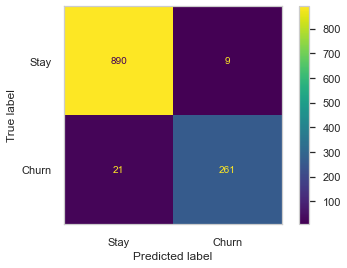

In [277]:
# create a confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix


# plot confusion matrix make it bigger
plot_confusion_matrix(best_xgb_model, X_test, Y_test,  display_labels=['Stay', 'Churn'])
plt.grid(False)
# Percentage precision
print("Precision: %.2f" % (precision_score(Y_test, best_xgb_model.predict(X_test)) * 100), "%")


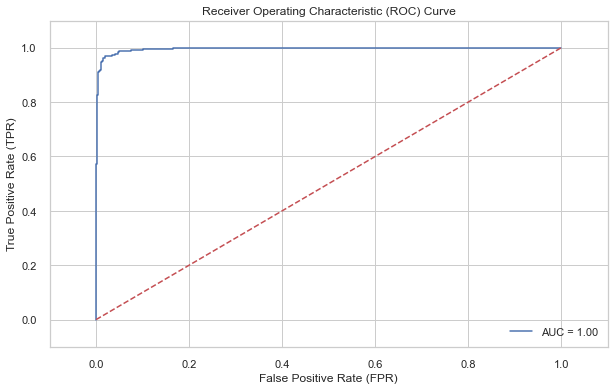

In [278]:
# plot roc_auc score
from sklearn.metrics import roc_curve, roc_auc_score
y_pred_proba = best_xgb_model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(Y_test, y_pred_proba)
roc_auc = roc_auc_score(Y_test, y_pred_proba)
plt.figure(figsize=(10, 6))
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.ylabel('True Positive Rate (TPR)')
plt.xlabel('False Positive Rate (FPR)')
plt.show()


#### E. Feature Importance

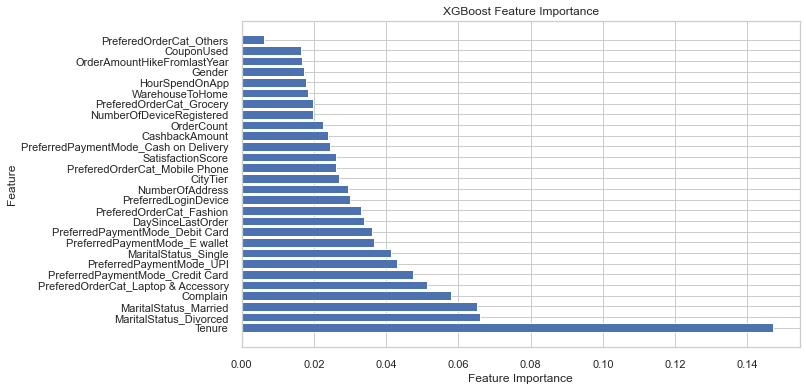

In [279]:
# Get feature importances
feature_importances = best_xgb_model.feature_importances_

# Get the names of the features (replace with your feature names if needed)
feature_names = list(X.columns)  # Replace X with your feature data

# Create a DataFrame to display the feature importances
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('XGBoost Feature Importance')
plt.show()

In [280]:
feature_importances_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)
feature_importances_df

,Feature,Importance
0,Tenure,0.147095
25,MaritalStatus_Divorced,0.065981
26,MaritalStatus_Married,0.065190
9,Complain,0.058013
22,PreferedOrderCat_Laptop & Accessory,0.051328
16,PreferredPaymentMode_Credit Card,0.047380
19,PreferredPaymentMode_UPI,0.042905
27,MaritalStatus_Single,0.041297
18,PreferredPaymentMode_E wallet,0.036610
17,PreferredPaymentMode_Debit Card,0.036105


In [281]:
print(importance_df[['Feature', 'Importance']])

                                  Feature  Importance
0                                  Tenure    0.147095
25                 MaritalStatus_Divorced    0.065981
26                  MaritalStatus_Married    0.065190
9                                Complain    0.058013
22    PreferedOrderCat_Laptop & Accessory    0.051328
16       PreferredPaymentMode_Credit Card    0.047380
19               PreferredPaymentMode_UPI    0.042905
27                   MaritalStatus_Single    0.041297
18          PreferredPaymentMode_E wallet    0.036610
17        PreferredPaymentMode_Debit Card    0.036105
13                      DaySinceLastOrder    0.033788
20               PreferedOrderCat_Fashion    0.033153
1                    PreferredLoginDevice    0.029947
8                         NumberOfAddress    0.029492
2                                CityTier    0.027033
23          PreferedOrderCat_Mobile Phone    0.025994
7                       SatisfactionScore    0.025985
15  PreferredPaymentMode_Cas

* Tenure : Pelanggan yang telah berlangganan dalam jangka waktu yang lama menunjukkan tingkat keterikatan yang kuat dengan layanan atau platform e-commerce tersebut. Mereka telah berlangganan dan melakukan transaksi dalam waktu yang lama. Hal ini mengindikasikan bahwa mereka puas dengan layanan tersebut dan merasa nyaman untuk tetap menggunakan layanan tersebut. Sebaliknya, pelanggan baru atau yang hanya berlangganan dalam waktu singkat cenderung lebih rentan untuk churn karena mereka belum memiliki hubungan yang kuat dengan bisnis.

* DaySinceLastOrder (Lama Waktu Sejak Pesanan Terakhir): Lamanya waktu sejak pesanan terakhir pelanggan mempengaruhi prediksi churn. Pelanggan yang tidak melakukan pesanan dalam waktu lama cenderung memiliki tingkat churn yang lebih tinggi. Pelanggan yang tidak melakukan pesanan dalam waktu lama, tim bisnis dapat mengambil langkah-langkah untuk merangsang aktivitas mereka. Ini bisa melibatkan pengiriman penawaran khusus, diskon, atau insentif untuk mendorong mereka berbelanja kembali. Strategi yang efektif untuk mengurangi churn adalah dengan memfokuskan perhatian pada pelanggan yang telah lama tidak bertransaksi.

* NumberOfDeviceRegistered (Jumlah Perangkat Didftarakan): Jumlah perangkat yang didaftarkan oleh pelanggan adalah faktor penting dalam memprediksi tingkat churn rate. Pelanggan yang mendaftarkan banyak perangkat mungkin menunjukkan bahwa mereka memiliki tingkat keterikatan yang kuat dengan layanan atau platform e-commerce tersebut. Sebaliknya, pelanggan yang hanya mendaftarkan sedikit atau bahkan tidak ada perangkat tambahan mungkin kurang terikat dan lebih cenderung untuk churn.

* NumberOfAddress (Jumlah Alamat): Jumlah alamat yang terkait dengan pelanggan adalah faktor yang signifikan dalam memprediksi tingkat churn rate. Pelanggan yang memiliki beberapa alamat terkait dengan akun mereka mungkin menunjukkan tingkat keterikatan yang tinggi dengan layanan atau platform e-commerce tersebut. Sebaliknya, pelanggan yang hanya memiliki satu alamat atau alamat yang minim mungkin kurang terikat dan lebih cenderung untuk churn.

* CashbackAmount (Besarnya Cashback): Besarnya cashback yang diterima oleh pelanggan memengaruhi tingkat churn rate. Pelanggan yang menerima cashback yang signifikan cenderung merasa lebih diuntungkan dan mungkin cenderung tetap menggunakan layanan tersebut.

* OrderAmountHikeFromlastYear (Peningkatan Jumlah Pesanan dari Tahun Sebelumnya): Perubahan dalam jumlah pesanan dari tahun sebelumnya adalah faktor penting dalam prediksi tingkat churn rate. Ketika pelanggan mengalami penurunan jumlah pesanan dari tahun sebelumnya, itu dapat menjadi sinyal bahwa mereka kurang puas atau lebih mungkin akan berhenti berlangganan. Sebaliknya, peningkatan jumlah pesanan dari tahun sebelumnya bisa menjadi tanda bahwa pelanggan semakin puas dan mungkin cenderung tetap setia.

* OrderCount (Jumlah Pesanan): Pelanggan yang sering melakukan pesanan dan aktif bertransaksi cenderung memiliki tingkat churn yang lebih rendah. Ini disebabkan oleh fakta bahwa pelanggan yang sering berbelanja menunjukkan keterikatan yang kuat dengan layanan atau platform e-commerce. Mereka merasa puas dengan pengalaman mereka dan melihat nilai yang didapat saat berlangganan.

* CouponUsed (Penggunaan Kupon): Penggunaan kupon oleh pelanggan memiliki dampak yang signifikan pada tingkat churn rate. Ketika pelanggan aktif menggunakan kupon untuk transaksinya, mereka mungkin merasa mendapatkan nilai tambahan dari layanan, dan ini dapat mengurangi keinginan mereka  untuk  berpindah ke E-commerce lain. Oleh karena itu, pelanggan yang sering menggunakan kupon cenderung memiliki tingkat churn yang lebih rendah, karena mereka merasa mendapatkan manfaat ekstra.

* WarehouseToHome (Waktu Pengiriman): Waktu pengiriman pesanan dari gudang ke rumah pelanggan memainkan peran dalam prediksi churn. Pengiriman yang lambat atau tidak efisien dapat menjadi faktor dalam keputusan pelanggan untuk meninggalkan layanan. Tim bisnis dapat meningkatkan efisiensi pengiriman dan perbaiki waktu pengiriman untuk meningkatkan kepuasan pelanggan.

* HourSpendOnApp (Jam yang Dihabiskan di Aplikasi): Meskipun memiliki dampak yang paling rendah, jumlah jam yang dihabiskan pelanggan di aplikasi tetap relevan. Pelanggan yang lebih aktif di aplikasi mungkin memiliki keterikatan yang lebih kuat. Tim bisnis dapat terus meningkatkan pengalaman pengguna di aplikasi dengan menambahkan fitur yang lebih menarik, pembaruan yang konsisten, dan promosi eksklusif di aplikasi. Dalam rangka memaksimalkan revenue dan mengurangi churn, tim bisnis e-commerce dapat menggabungkan pemahaman yang mendalam tentang faktor-faktor ini dalam strategi mereka. Ini akan membantu mereka mempertahankan pelanggan yang ada, mendorong pengeluaran yang lebih tinggi, dan menciptakan pengalaman pelanggan yang lebih memuaskan.

* Complain : Memperhatikan keluhan pelanggan dan menerapkan strategi untuk mengatasinya agar berpotensi mengurangi churn. Hal ini dapat melibatkan peningkatan layanan pelanggan, menyelesaikan masalah dengan segera, atau mengambil tindakan lain untuk mengurangi dampak keluhan terhadap kepuasan dan retensi pelanggan. Meningkatkan Layanan Pelanggan , tingkatkan proses layanan pelanggan untuk menangani dan menyelesaixkan keluhan dengan lebih efisien. Memberikan solusi yang tepat waktu dan efektif untuk masalah pelanggan dapat berdampak positif pada kepuasan pelanggan dan mengurangi kemungkinan terjadinya churn.


### Next Steps

* Segmentasi Pelanggan: Gunakan wawasan yang diperoleh dari tingkat kepentingan fitur untuk menyegmentasikan basis pelanggan Anda. Identifikasi dan kelompokkan pelanggan dengan karakteristik yang sama, seperti masa penggunaan aps, status pernikahan, kategori pesanan favorite, cara pembayaran, dan lainnya. Hal ini dapat membantu Anda menyesuaikan strategi retensi untuk setiap segmen.

* Profil Risiko Churn: Buat profil risiko churn berdasarkan pentingnya fitur. Identifikasi pelanggan yang menunjukkan karakteristik risiko tertinggi, dan fokuskan upaya Anda untuk mempertahankan mereka. Hal ini dapat dilakukan dengan menawarkan insentif yang ditargetkan, komunikasi yang dipersonalisasi, atau promosi khusus kepada pelanggan berisiko tinggi ini.

## Plot Partial Dependence

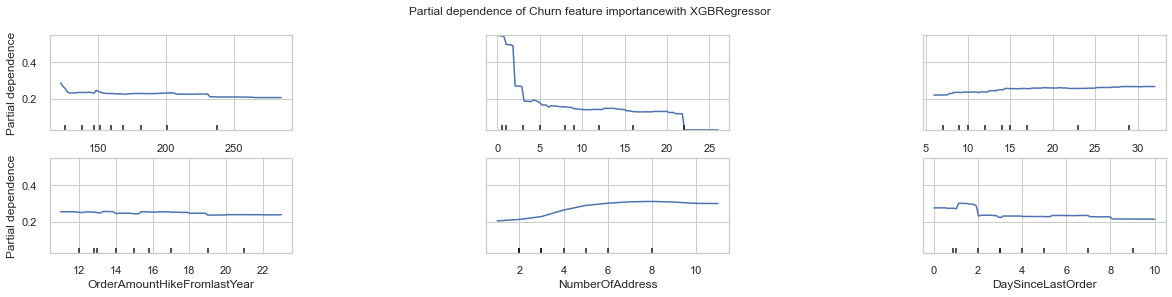

In [282]:
from sklearn.inspection import PartialDependenceDisplay

# Computing partial dependence plots

feature_names = ['CashbackAmount', 'Tenure', 'WarehouseToHome',
                 'OrderAmountHikeFromlastYear', 'NumberOfAddress', 'DaySinceLastOrder']

features = [0, 1, (0,1)]
PartialDependenceDisplay.from_estimator(best_xgb_model, X_train, feature_names)
fig = plt.gcf()
fig.suptitle('Partial dependence of Churn feature importancewith XGBRegressor')
fig.set_figwidth(20)
fig.subplots_adjust(wspace=0.8,hspace=0.3)

## Simulation

In [283]:
c = [col for col in df_before_norm if '_' in col]
df_stg4 = df_before_norm.drop(columns=c)
df_simulasi=df_stg4.copy()
df_simulasi.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5350 entries, 0 to 5629
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5350 non-null   int64  
 1   Churn                        5350 non-null   int64  
 2   Tenure                       5350 non-null   float64
 3   PreferredLoginDevice         5350 non-null   int64  
 4   CityTier                     5350 non-null   int64  
 5   WarehouseToHome              5350 non-null   float64
 6   Gender                       5350 non-null   int64  
 7   HourSpendOnApp               5350 non-null   float64
 8   NumberOfDeviceRegistered     5350 non-null   int64  
 9   SatisfactionScore            5350 non-null   int64  
 10  NumberOfAddress              5350 non-null   int64  
 11  Complain                     5350 non-null   int64  
 12  OrderAmountHikeFromlastYear  5350 non-null   float64
 13  CouponUsed        

In [284]:
df_simulasi = df_simulasi.drop(['CustomerID'], axis=1)

In [285]:
jumlah_tenure = [2]


for i in jumlah_tenure:
  df_simulasi_y1 = df_before_norm.query("Churn==1")
  y_simulasi_revenue_churn =  [x/0.05 for x in df_simulasi_y1["CashbackAmount"].tolist()]
  df_simulasi_y1["Tenure"] = i
  df_simulasi_y1["revenue"] = df_simulasi_y1["CashbackAmount"]/0.05
  df_simulasi_y1["CashbackAmount"] = df_simulasi_y1["CashbackAmount"]+25
  prediksi = best_model.predict(df_simulasi_y1.drop(["Churn","revenue"],axis=1))
  df_simulasi_y1["pred"] = prediksi
  revenue_saved = df_simulasi_y1[df_simulasi_y1["pred"] == 0]["revenue"].sum()
  cost= df_simulasi_y1[df_simulasi_y1["pred"] == 0]["CashbackAmount"].sum()
  margin=revenue_saved-cost
      
      
  print(f"Jumlah Churn awal adalah {len(df_simulasi_y1)} orang")
  print(f"Jumlah Churn ketika Tenure = {i} adalah {sum(prediksi)} orang")
  print(f"Potential Revenue kalau bisa diselamatkan ($) {round(revenue_saved,2)}")
  print(f"Cost yang digunakan untuk menyelamatkan customer ($) {round(cost,2)}")
  print(f"margin yang didapatkan setelah menyelamatkan customer ($) {round(margin,2)}")
  print("")

Jumlah Churn awal adalah 912 orang
Jumlah Churn ketika Tenure = 2 adalah 322 orang
Potential Revenue kalau bisa diselamatkan ($) 1807943.8
Cost yang digunakan untuk menyelamatkan customer ($) 105147.19
margin yang didapatkan setelah menyelamatkan customer ($) 1702796.61



In [286]:
jumlah_tenure = [50]


for i in jumlah_tenure:
  df_simulasi_y1 = df_before_norm.query("Churn==1")
  y_simulasi_revenue_churn =  [x/0.05 for x in df_simulasi_y1["CashbackAmount"].tolist()]
  df_simulasi_y1["Tenure"] = i
  df_simulasi_y1["revenue"] = df_simulasi_y1["CashbackAmount"]/0.05
  df_simulasi_y1["CashbackAmount"] = df_simulasi_y1["CashbackAmount"]+25
  prediksi = best_model.predict(df_simulasi_y1.drop(["Churn","revenue"],axis=1))
  df_simulasi_y1["pred"] = prediksi
  revenue_saved = df_simulasi_y1[df_simulasi_y1["pred"] == 0]["revenue"].sum()
  cost= df_simulasi_y1[df_simulasi_y1["pred"] == 0]["CashbackAmount"].sum()
  margin=revenue_saved-cost
      
      
  print(f"Jumlah Churn awal adalah {len(df_simulasi_y1)} orang")
  print(f"Jumlah Churn ketika Tenure = {i} adalah {sum(prediksi)} orang")
  print(f"Potential Revenue kalau bisa diselamatkan ($) {round(revenue_saved,2)}")
  print(f"Cost yang digunakan untuk menyelamatkan customer ($) {round(cost,2)}")
  print(f"margin yang didapatkan setelah menyelamatkan customer ($) {round(margin,2)}")
  print("")

Jumlah Churn awal adalah 912 orang
Jumlah Churn ketika Tenure = 50 adalah 6 orang
Potential Revenue kalau bisa diselamatkan ($) 2859828.2
Cost yang digunakan untuk menyelamatkan customer ($) 165641.41
margin yang didapatkan setelah menyelamatkan customer ($) 2694186.79

